In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


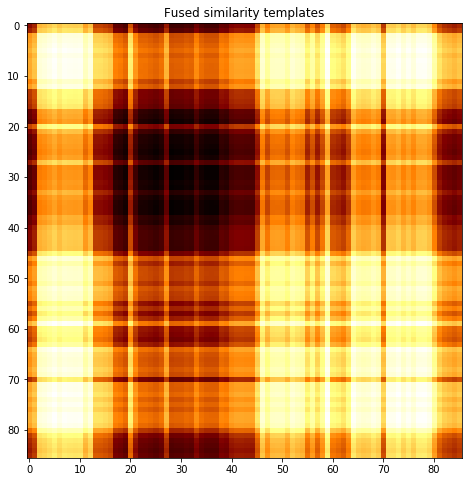

subject 30; gesture 1_1_1


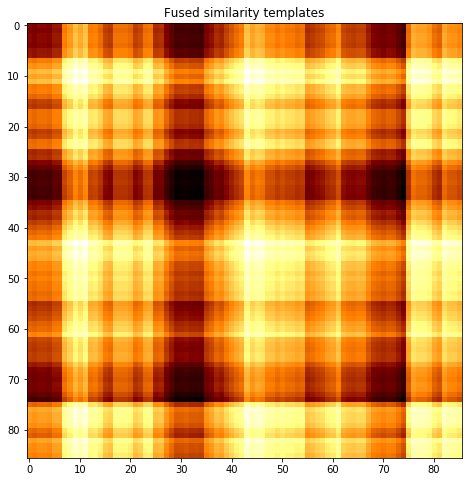

subject 30; gesture 1_0_1


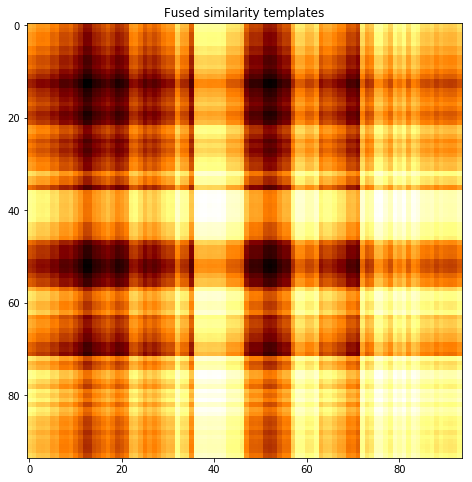

subject 30; gesture 1_0_2


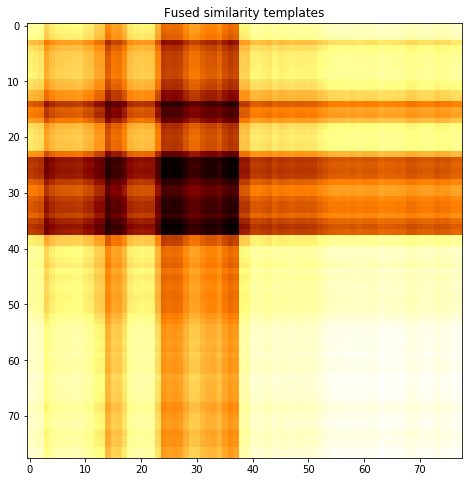

subject 06; gesture 1_1_2


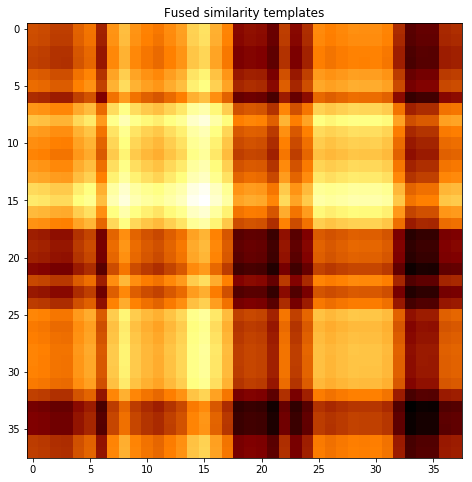

subject 06; gesture 1_1_1


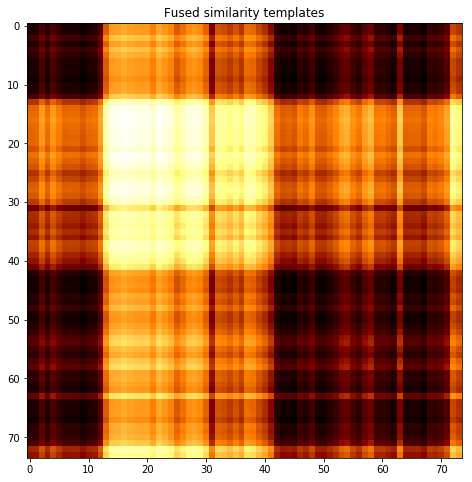

subject 06; gesture 1_0_1


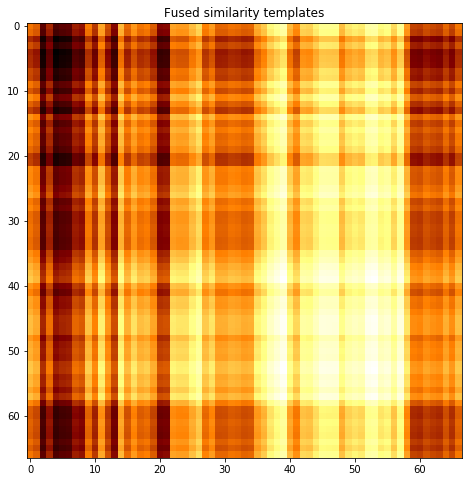

subject 06; gesture 1_0_2


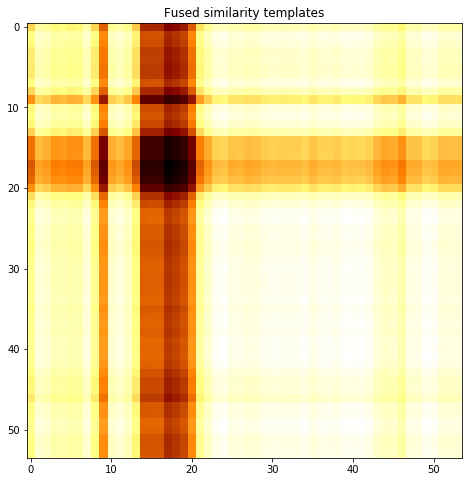

subject 09; gesture 1_1_2


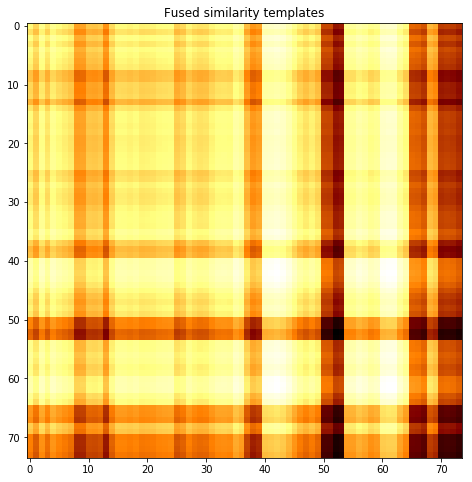

subject 09; gesture 1_1_1


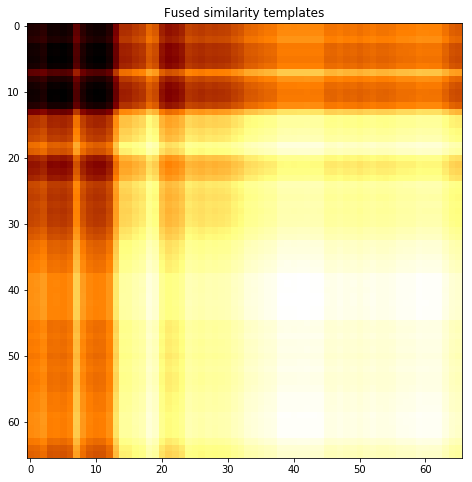

subject 09; gesture 1_0_1


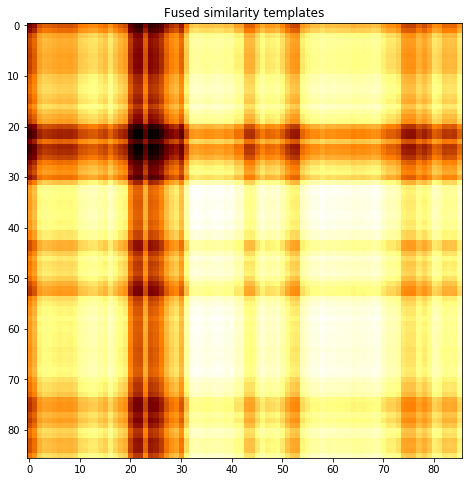

subject 09; gesture 1_0_2


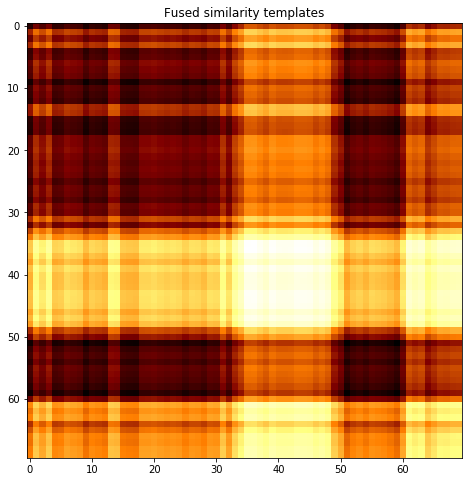

subject 03; gesture 1_1_2


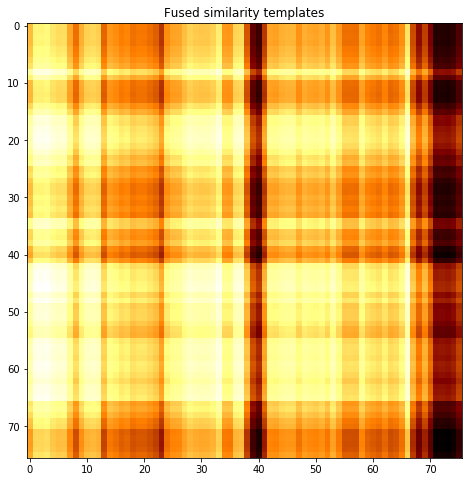

subject 03; gesture 1_1_1


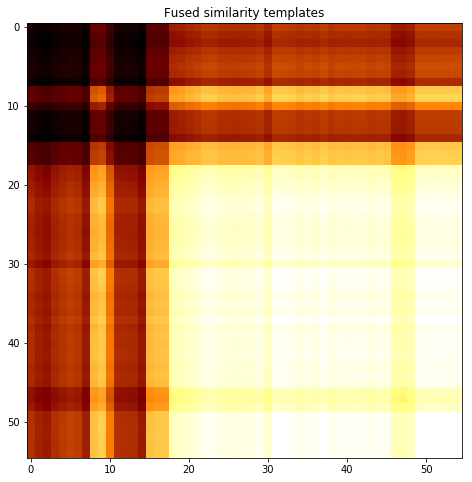

subject 03; gesture 1_0_1


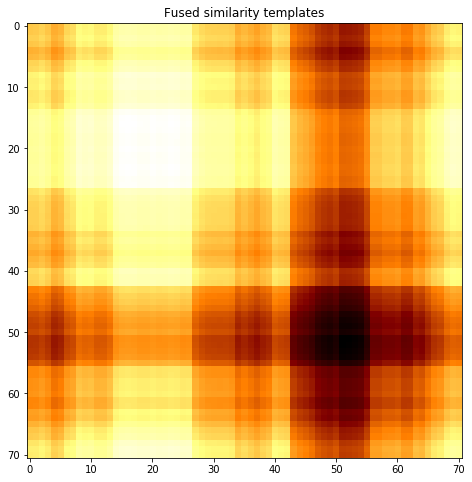

subject 03; gesture 1_0_2


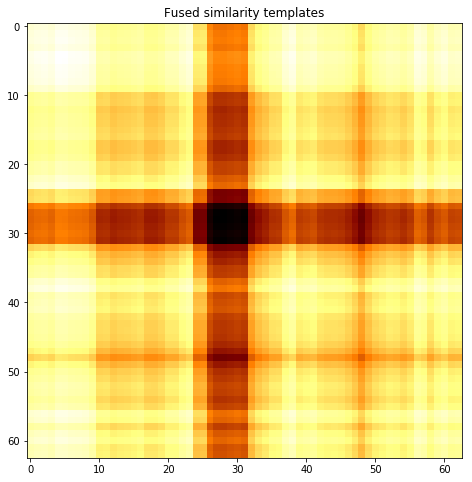

subject 05; gesture 1_1_2


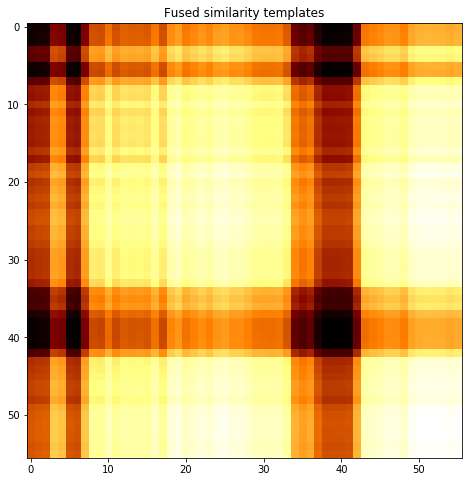

subject 05; gesture 1_1_1


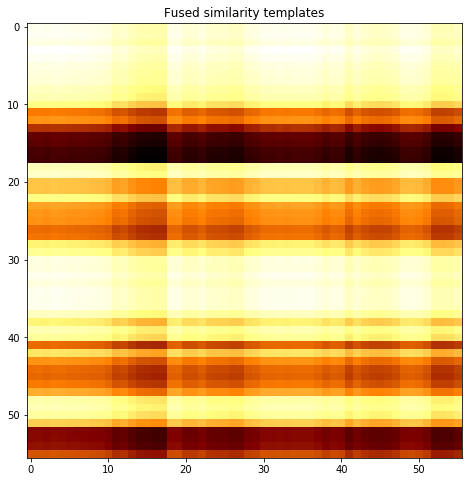

subject 05; gesture 1_0_1


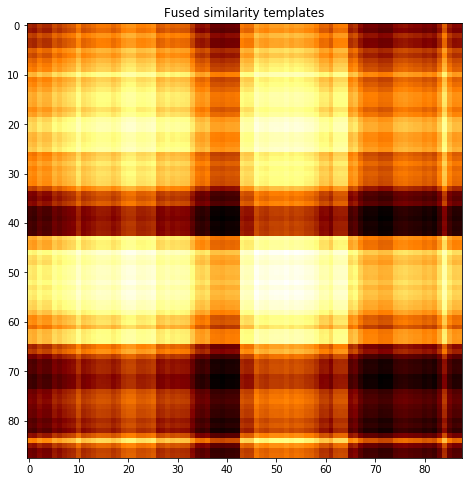

subject 05; gesture 1_0_2


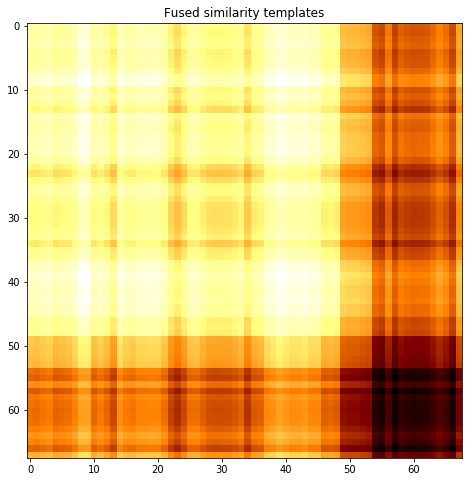

subject 21; gesture 1_1_2


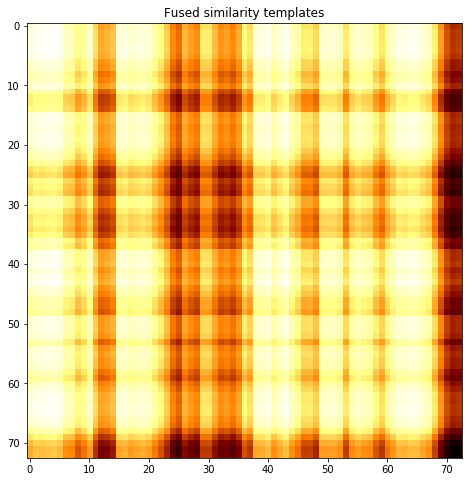

subject 21; gesture 1_1_1


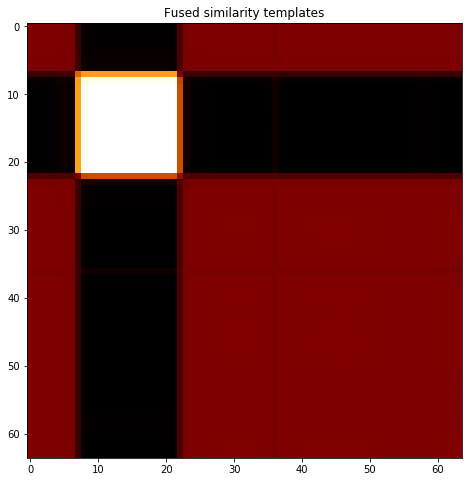

subject 21; gesture 1_0_1


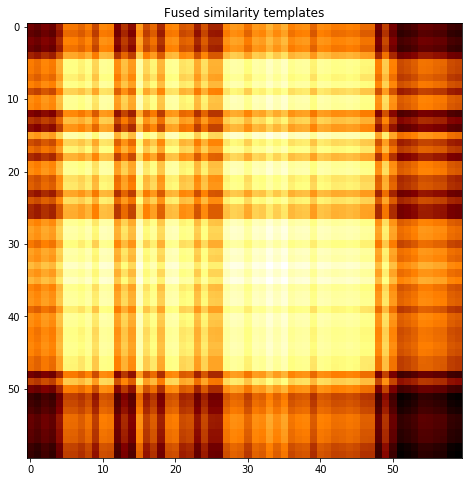

subject 21; gesture 1_0_2


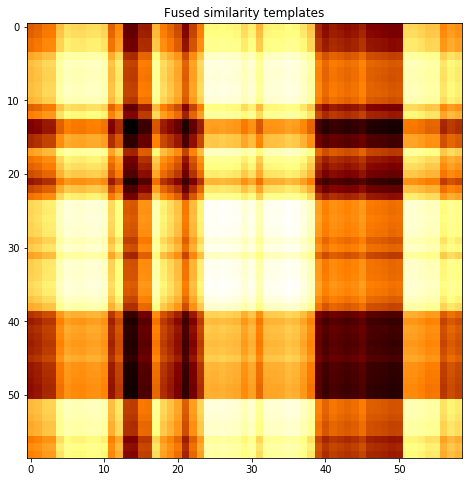

subject 17; gesture 1_1_2


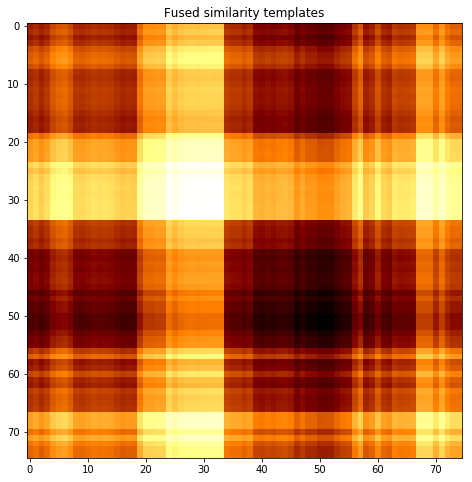

subject 17; gesture 1_1_1


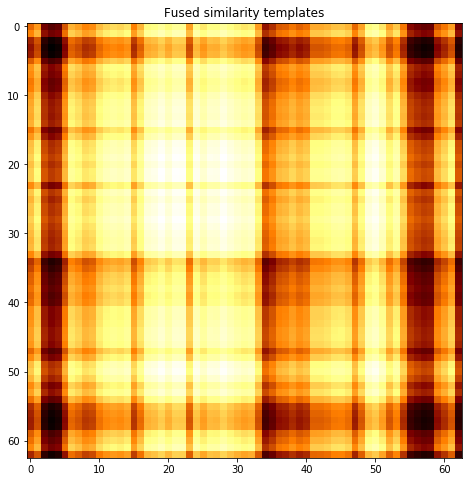

subject 17; gesture 1_0_1


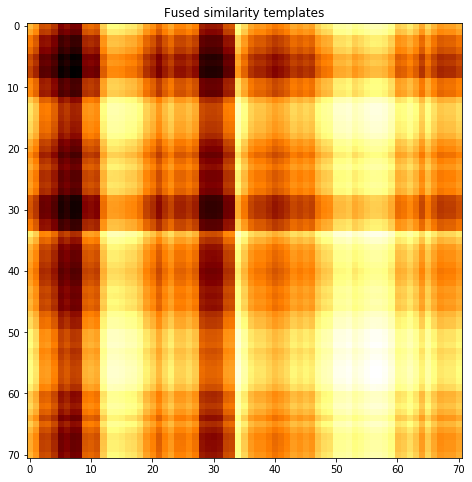

subject 17; gesture 1_0_2


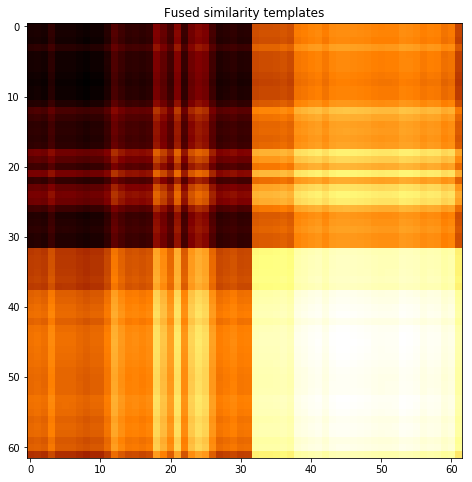

subject 01; gesture 1_1_2


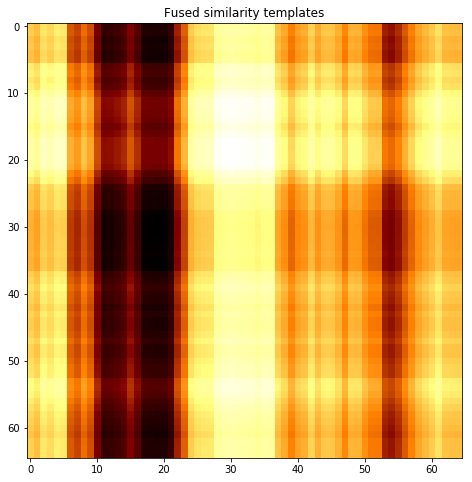

subject 01; gesture 1_1_1


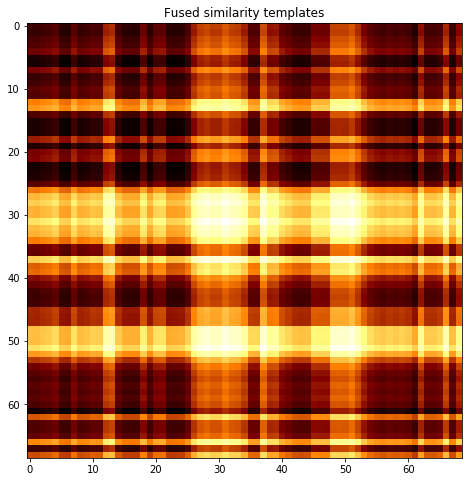

subject 01; gesture 1_0_1


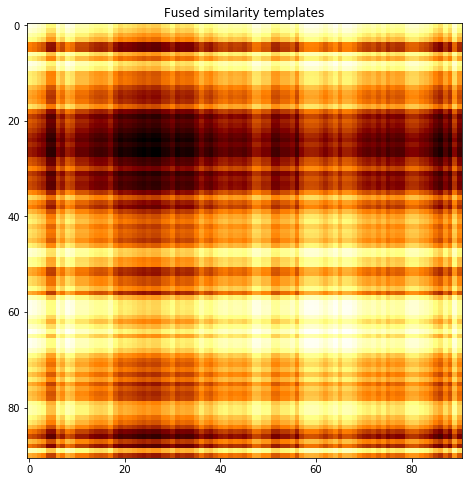

subject 01; gesture 1_0_2


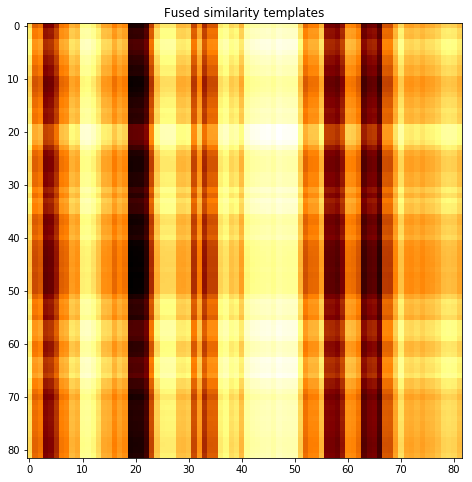

subject 16; gesture 1_1_2


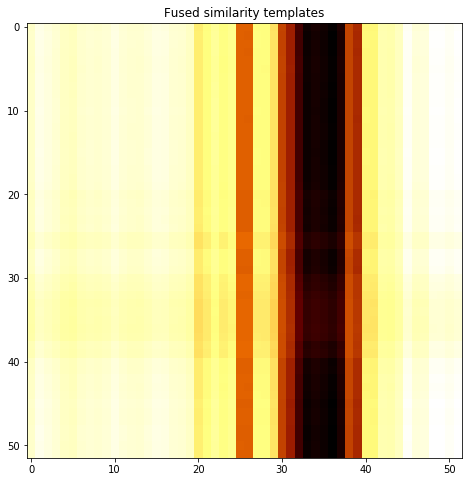

subject 16; gesture 1_1_1


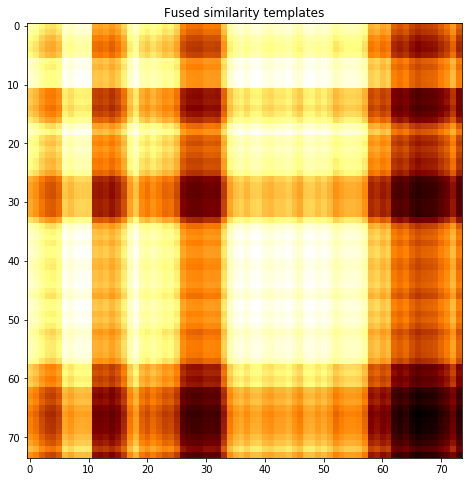

subject 16; gesture 1_0_1


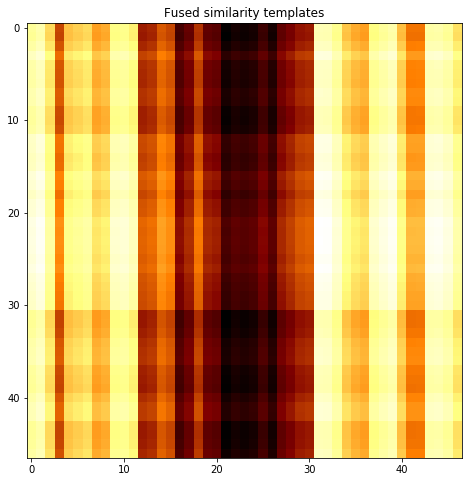

subject 16; gesture 1_0_2


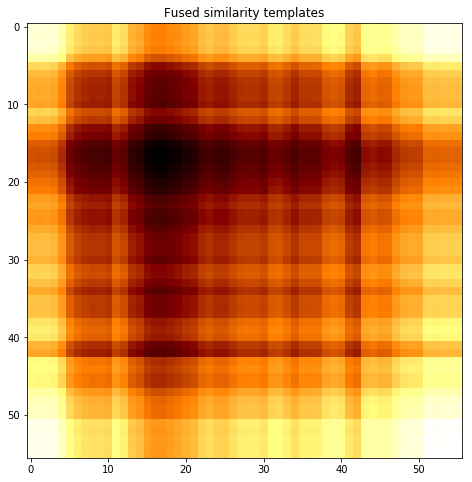

subject 26; gesture 1_1_2


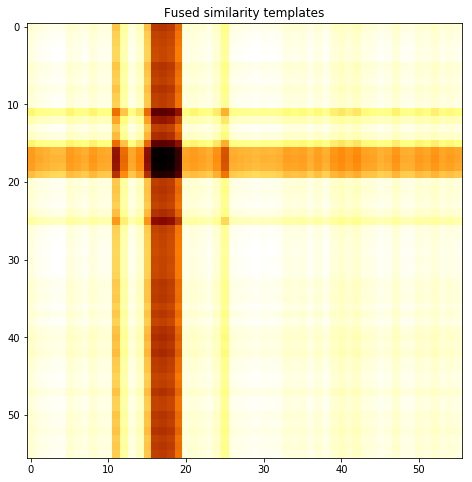

subject 26; gesture 1_1_1


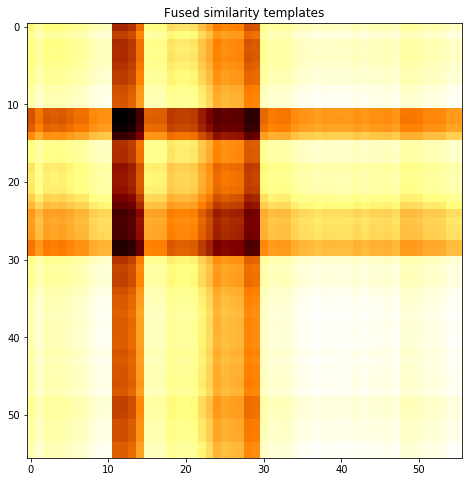

subject 26; gesture 1_0_1


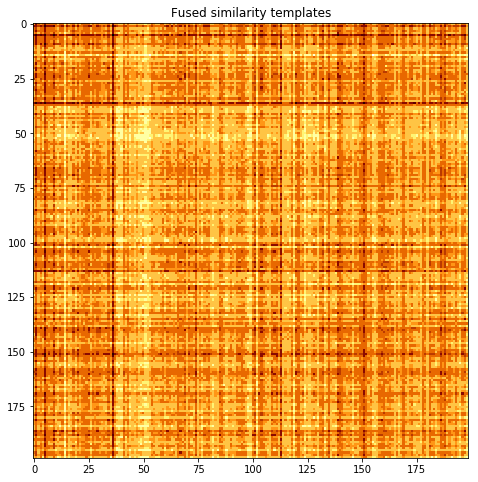

subject 26; gesture 1_0_2


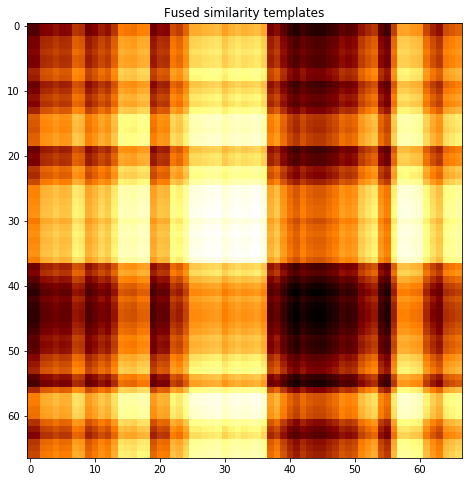

subject 32; gesture 1_1_2


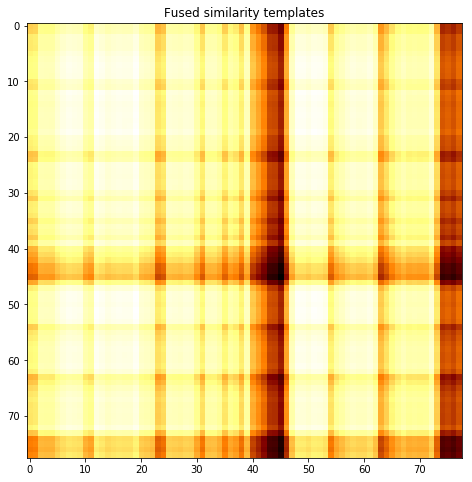

subject 32; gesture 1_1_1


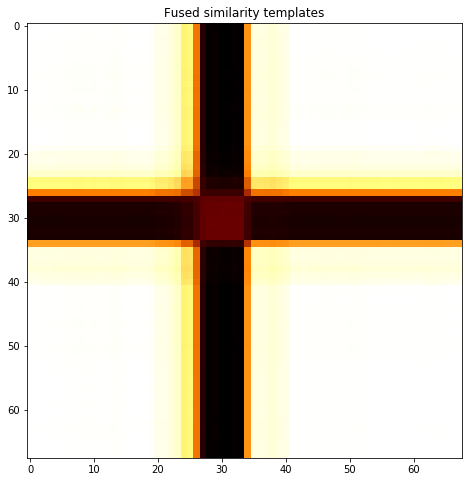

subject 32; gesture 1_0_1


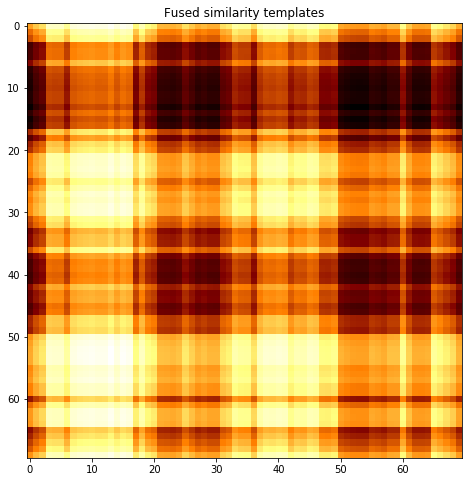

subject 32; gesture 1_0_2


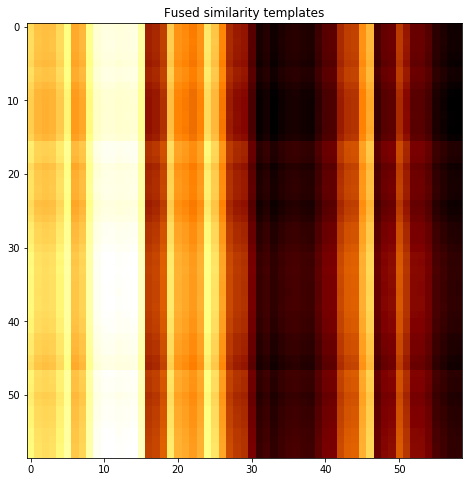

subject 04; gesture 1_1_2


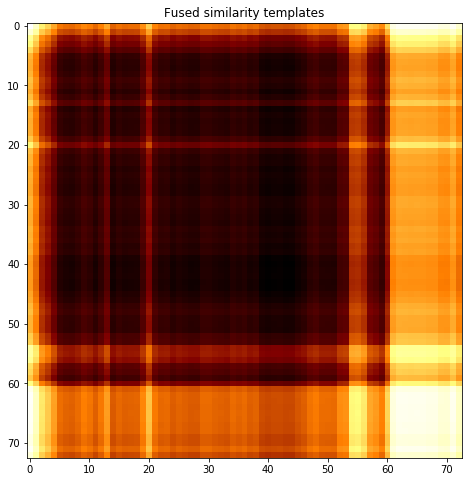

subject 04; gesture 1_1_1


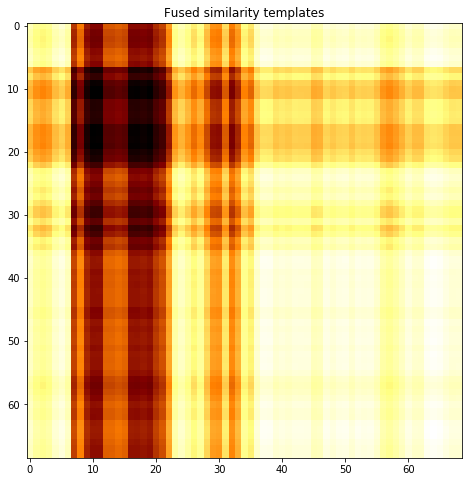

subject 04; gesture 1_0_1


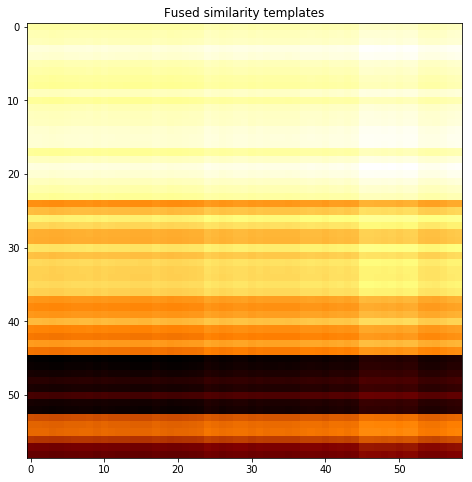

subject 04; gesture 1_0_2


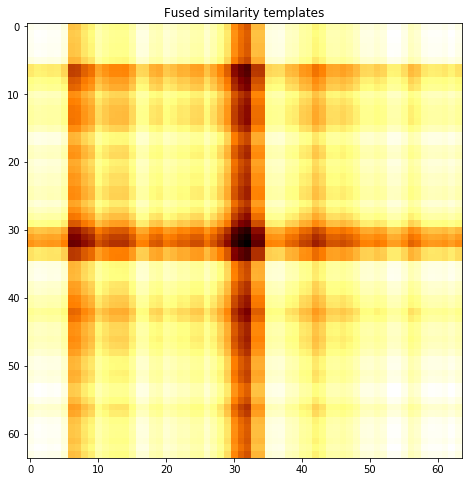

subject 08; gesture 1_1_2


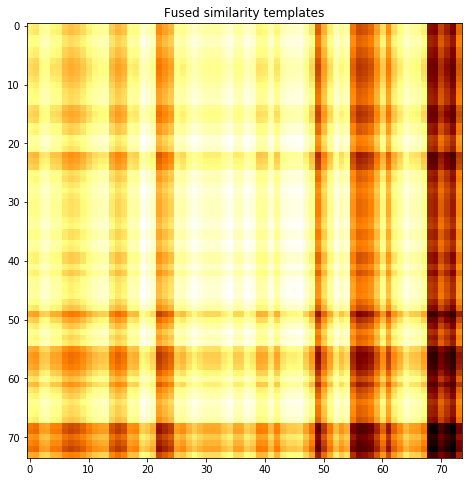

subject 08; gesture 1_1_1


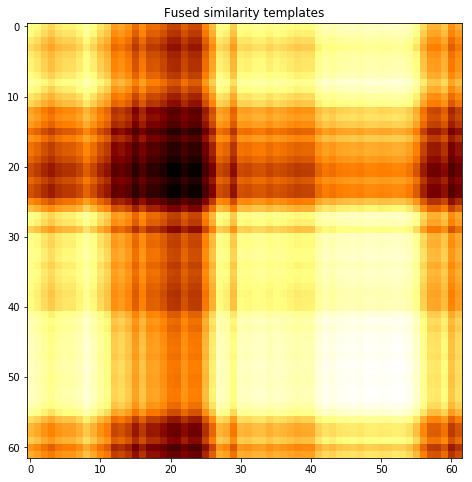

subject 08; gesture 1_0_1


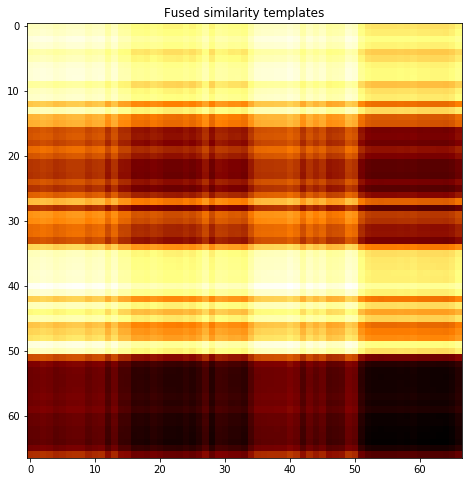

subject 08; gesture 1_0_2


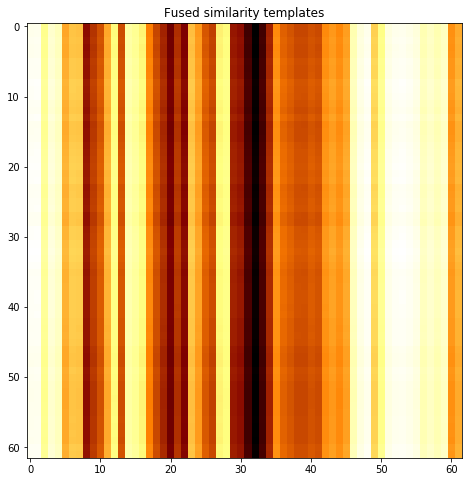

subject 27; gesture 1_1_2


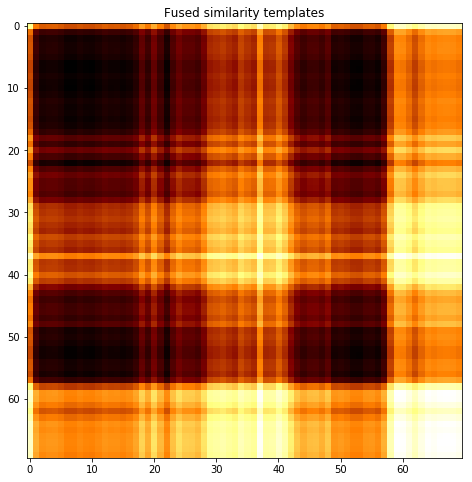

subject 27; gesture 1_1_1


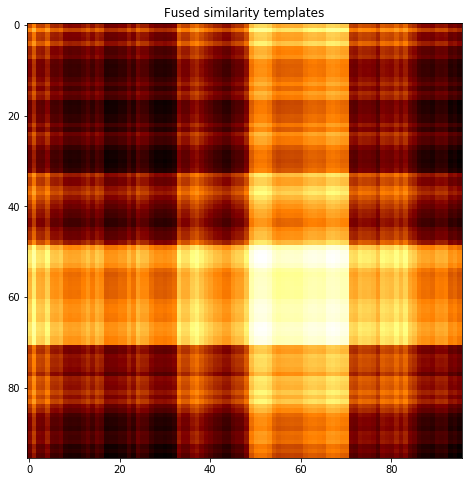

subject 27; gesture 1_0_1


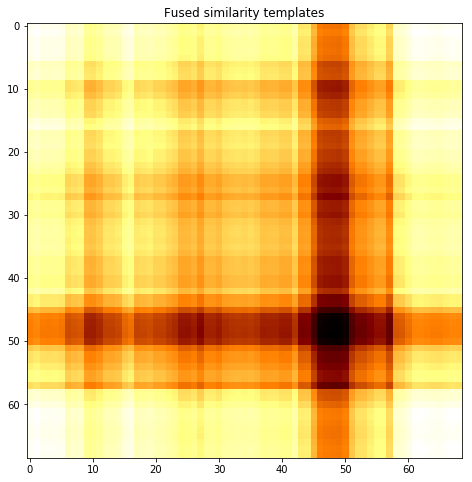

subject 27; gesture 1_0_2


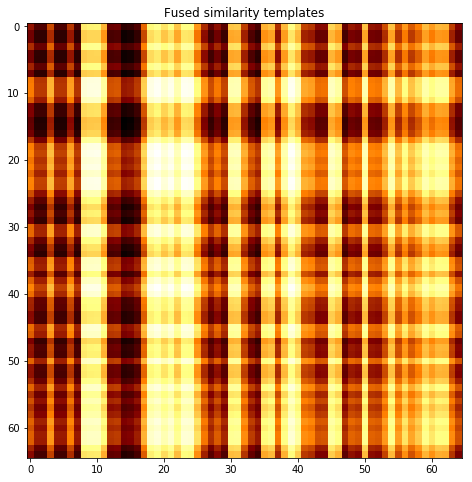

subject 14; gesture 1_1_2


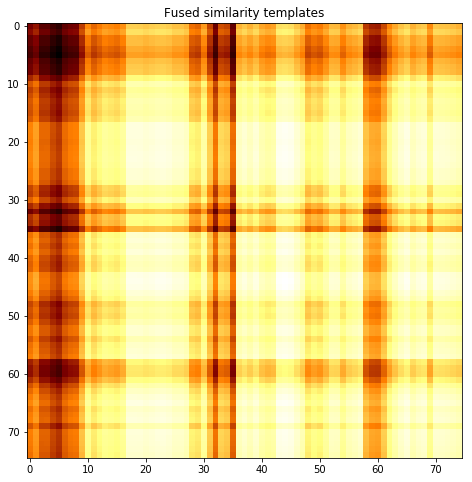

subject 14; gesture 1_1_1


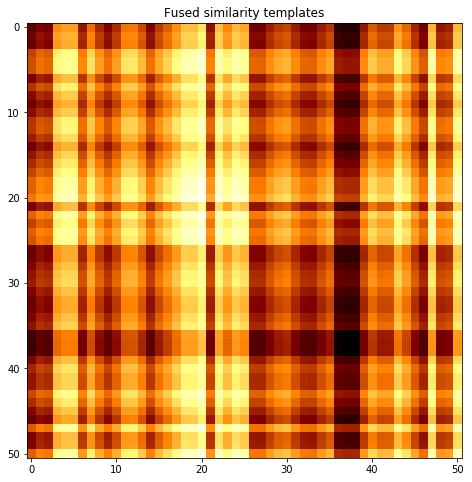

subject 14; gesture 1_0_1


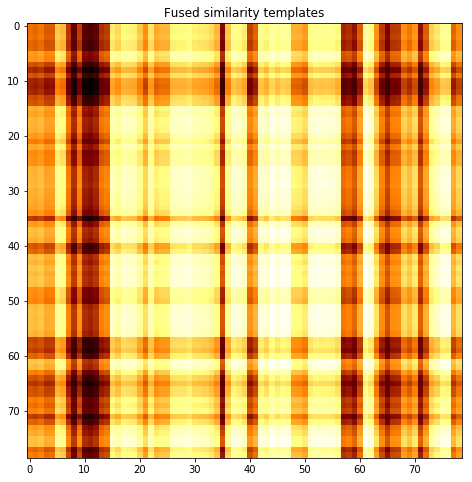

subject 14; gesture 1_0_2


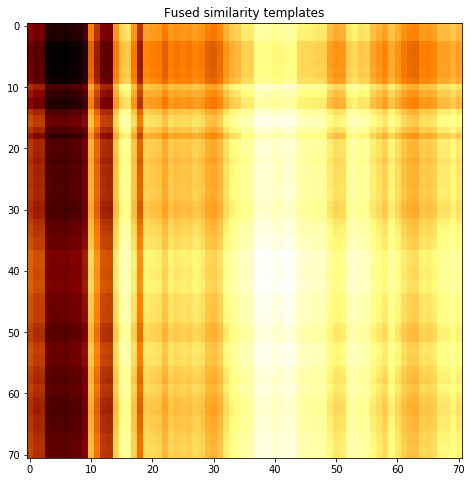

subject 23; gesture 1_1_2


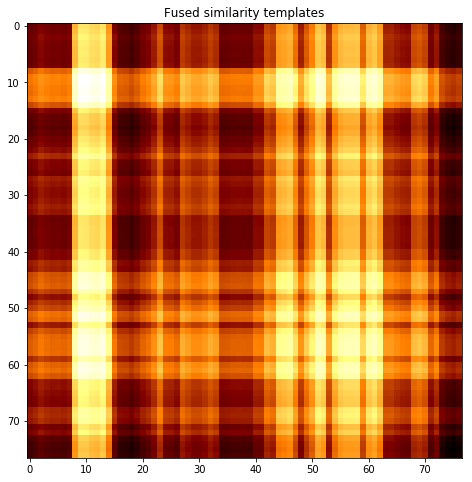

subject 23; gesture 1_1_1


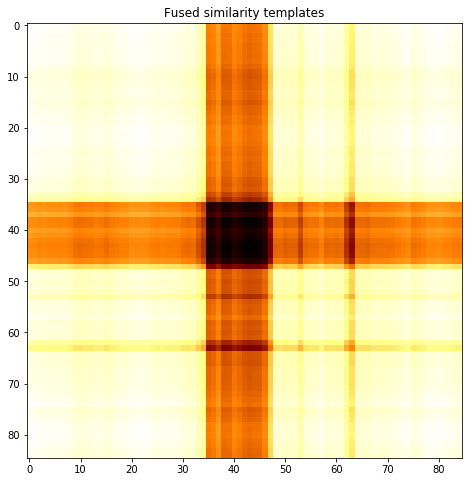

subject 23; gesture 1_0_1


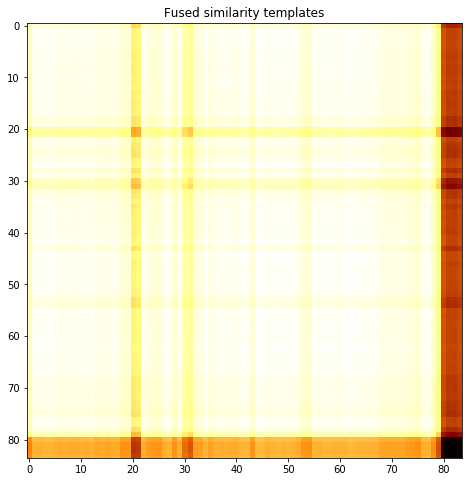

subject 23; gesture 1_0_2


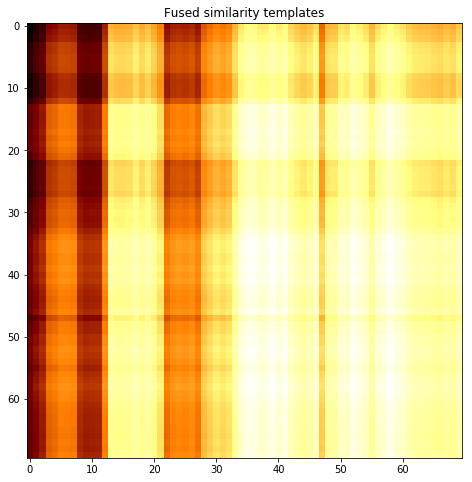

subject 25; gesture 1_1_2


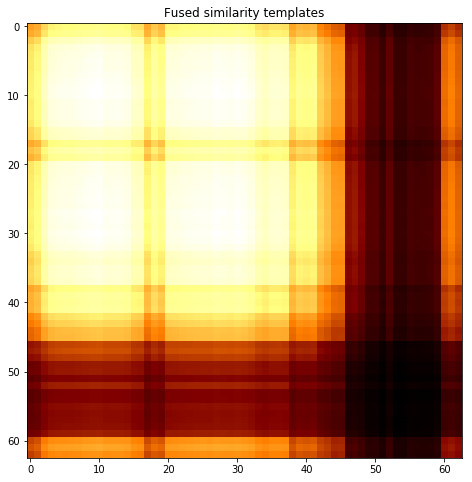

subject 25; gesture 1_1_1


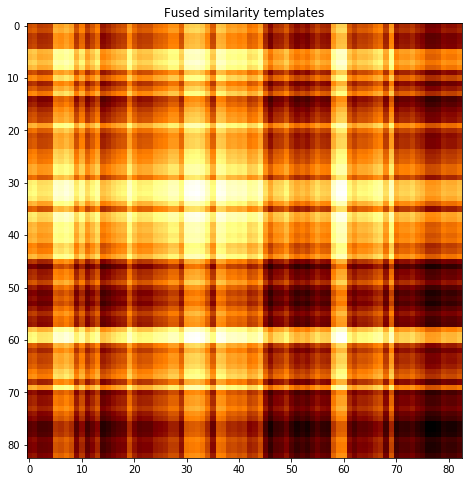

subject 25; gesture 1_0_1


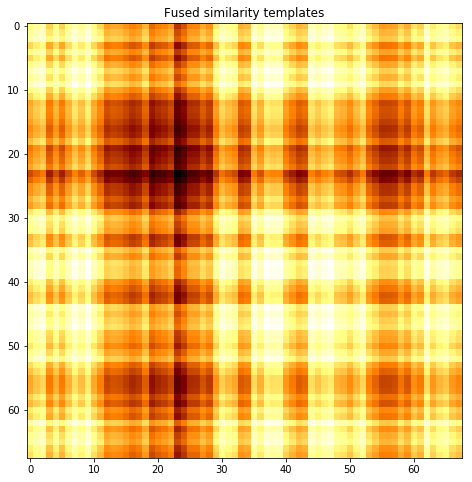

subject 25; gesture 1_0_2


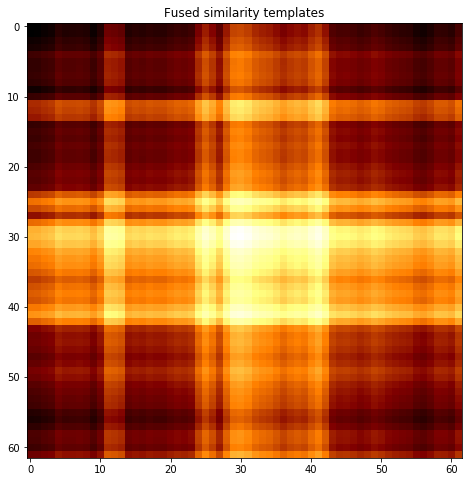

subject 18; gesture 1_1_2


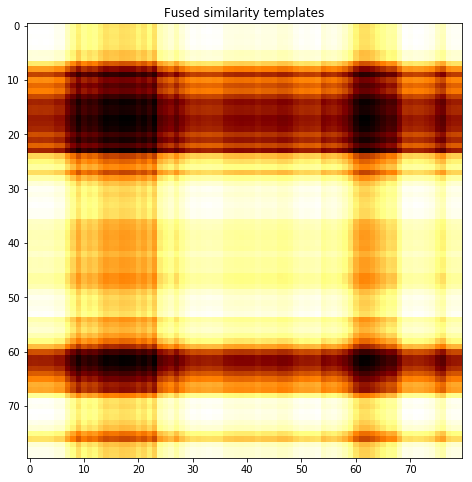

subject 18; gesture 1_1_1


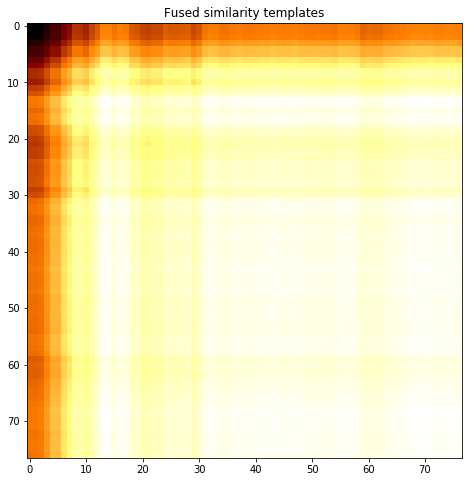

subject 18; gesture 1_0_1


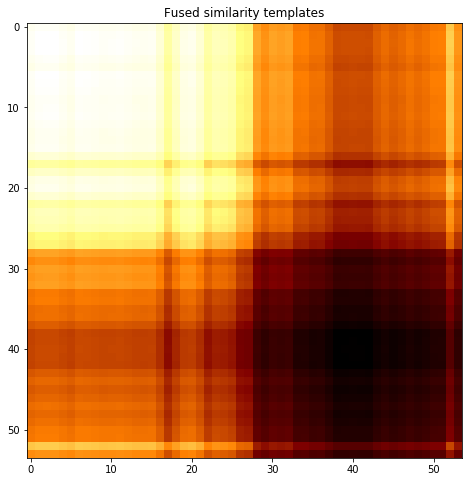

subject 18; gesture 1_0_2


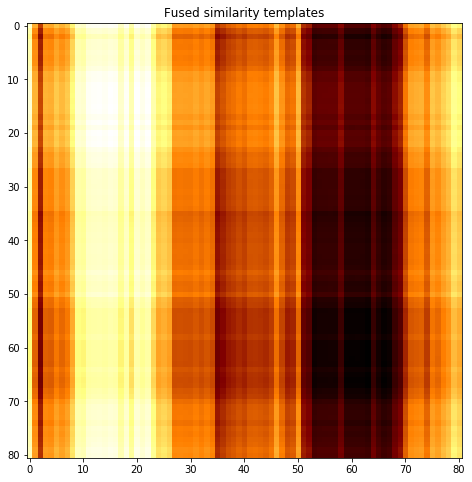

subject 29; gesture 1_1_2


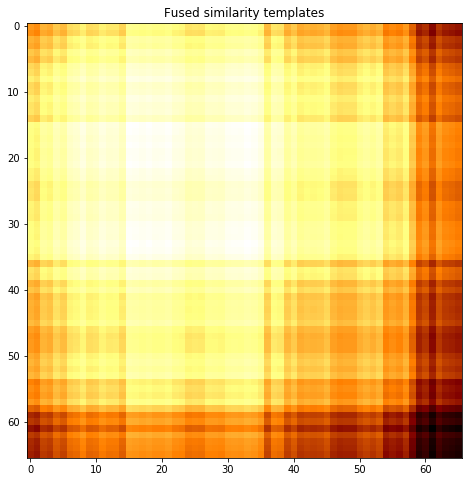

subject 29; gesture 1_1_1


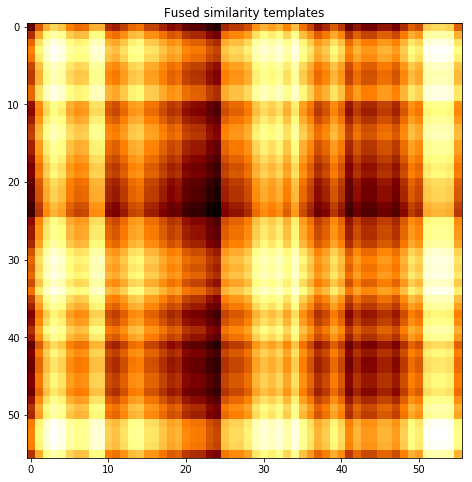

subject 29; gesture 1_0_1


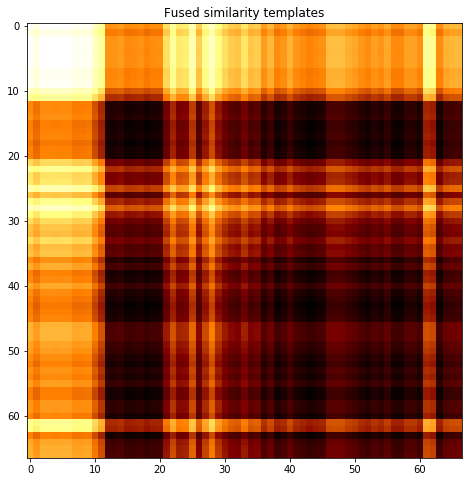

subject 29; gesture 1_0_2


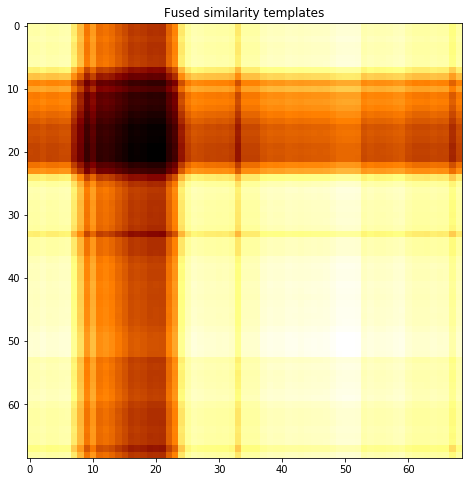

subject 15; gesture 1_1_2


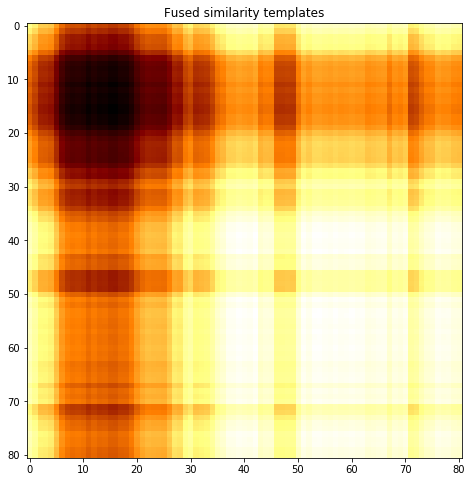

subject 15; gesture 1_1_1


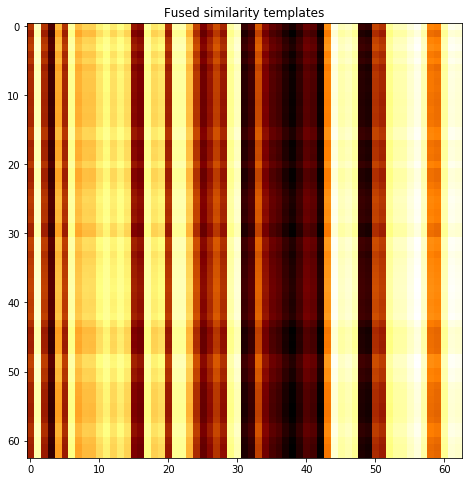

subject 15; gesture 1_0_1


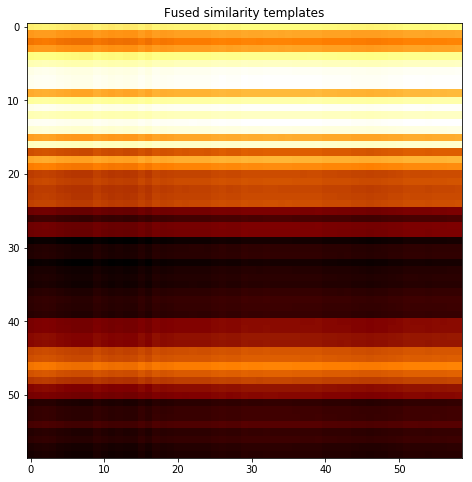

subject 15; gesture 1_0_2


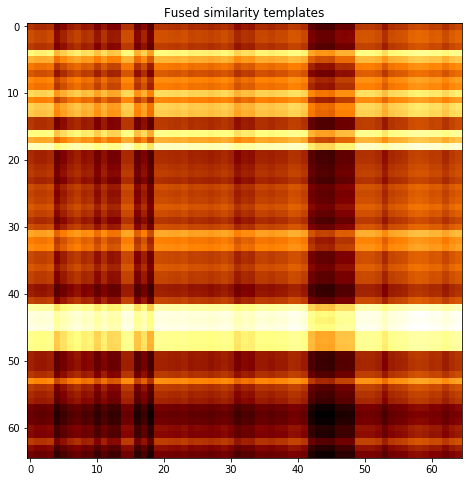

subject 28; gesture 1_1_2


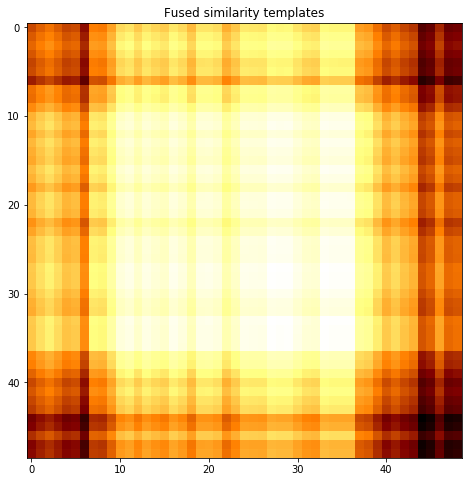

subject 28; gesture 1_1_1


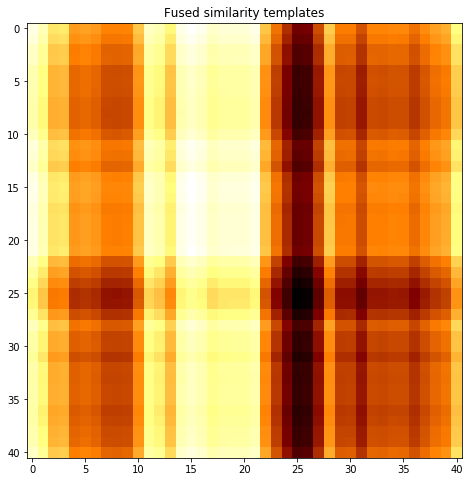

subject 28; gesture 1_0_1


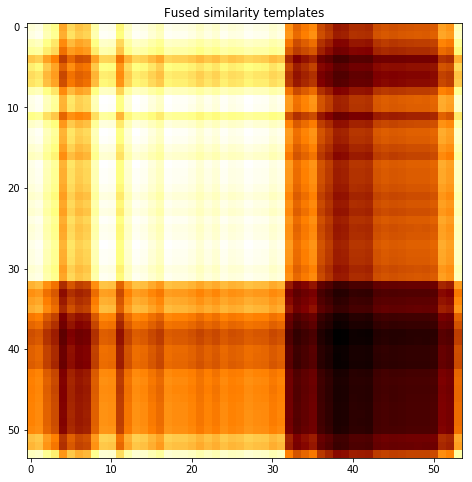

subject 28; gesture 1_0_2


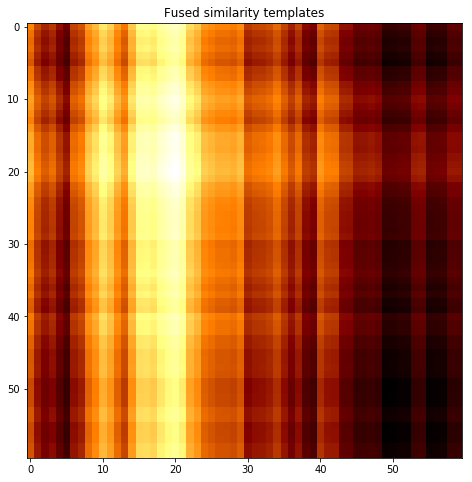

subject 12; gesture 1_1_2


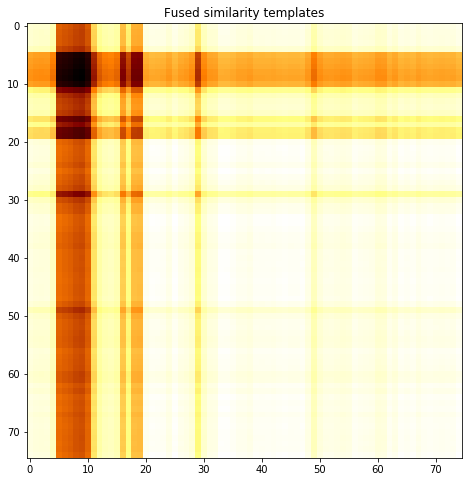

subject 12; gesture 1_1_1


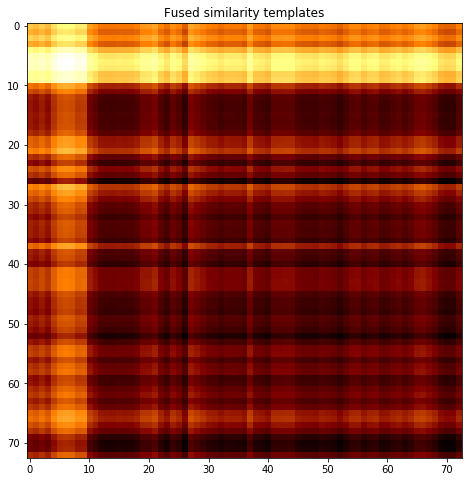

subject 12; gesture 1_0_1


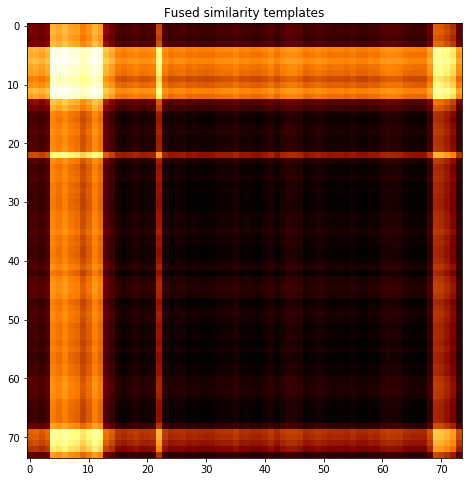

subject 12; gesture 1_0_2


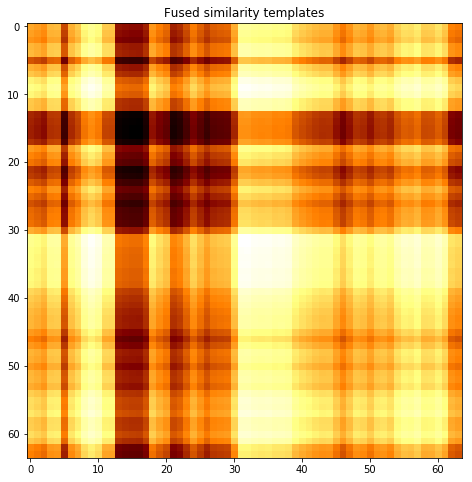

subject 19; gesture 1_1_2


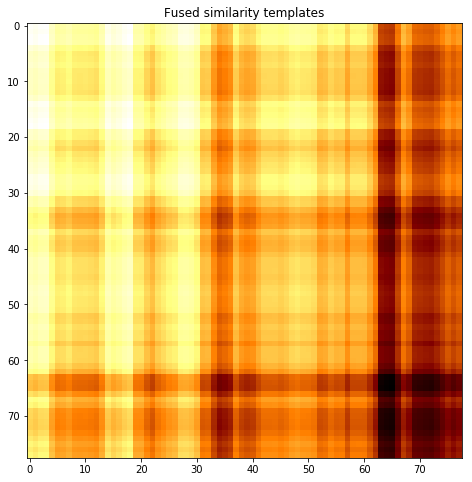

subject 19; gesture 1_1_1


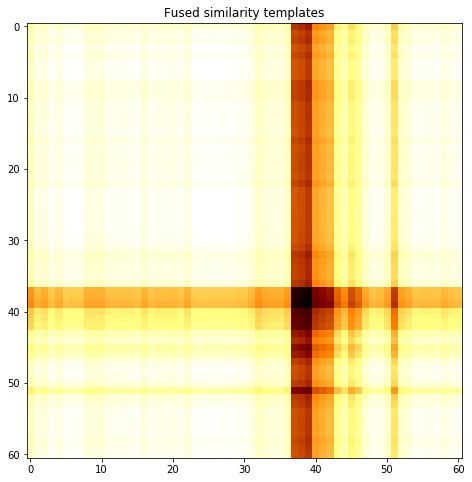

subject 19; gesture 1_0_1


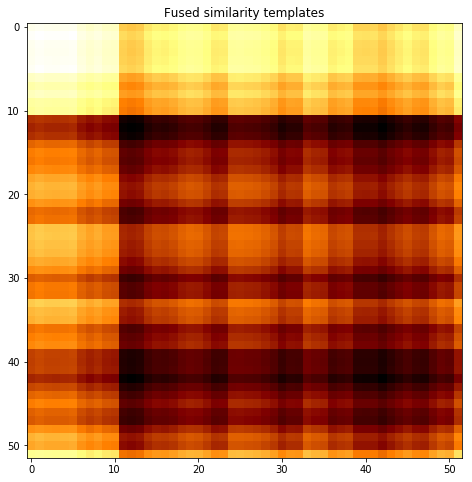

subject 19; gesture 1_0_2


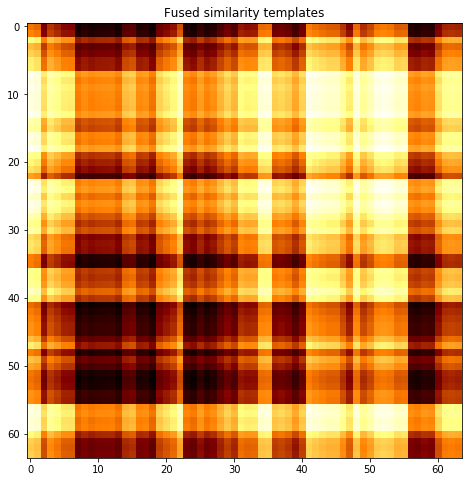

subject 07; gesture 1_1_2


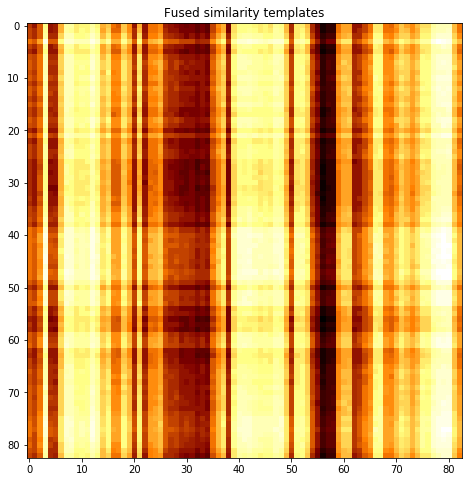

subject 07; gesture 1_1_1


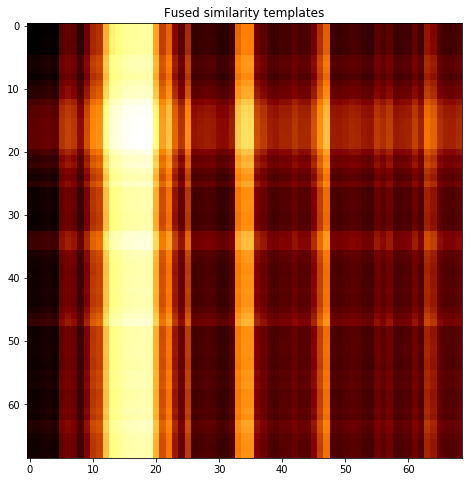

subject 07; gesture 1_0_1


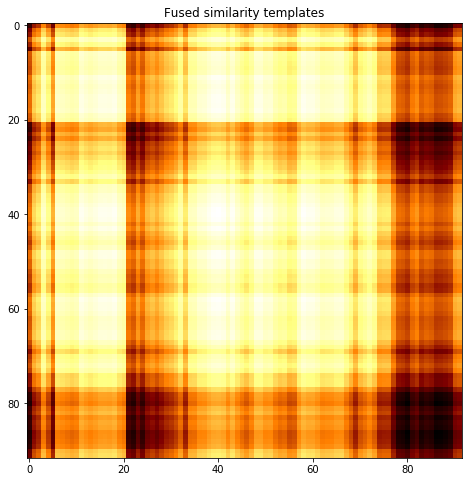

subject 07; gesture 1_0_2


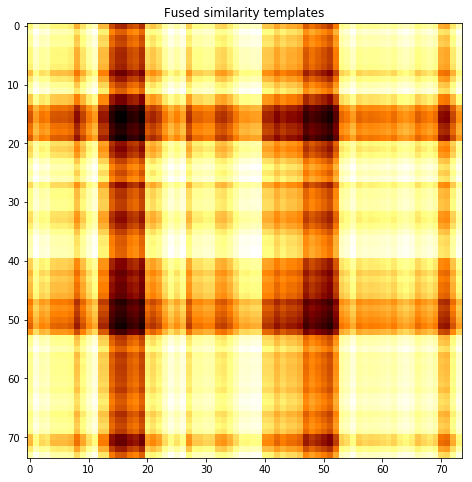

subject 20; gesture 1_1_2


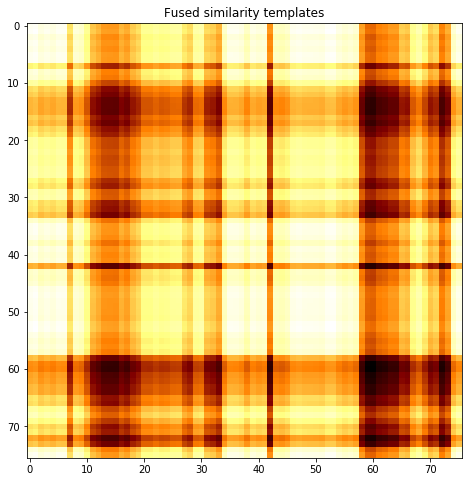

subject 20; gesture 1_1_1


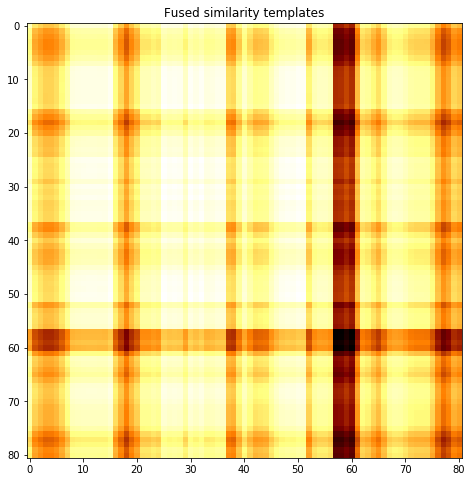

subject 20; gesture 1_0_1


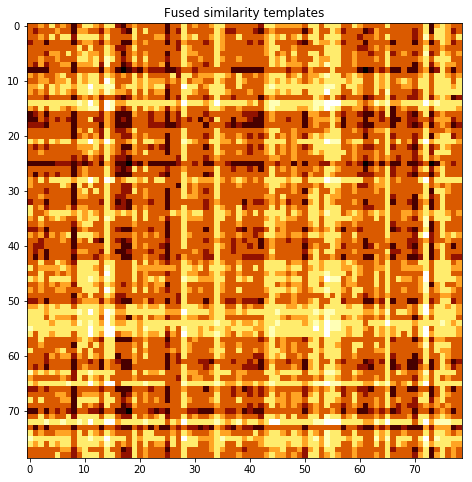

subject 20; gesture 1_0_2


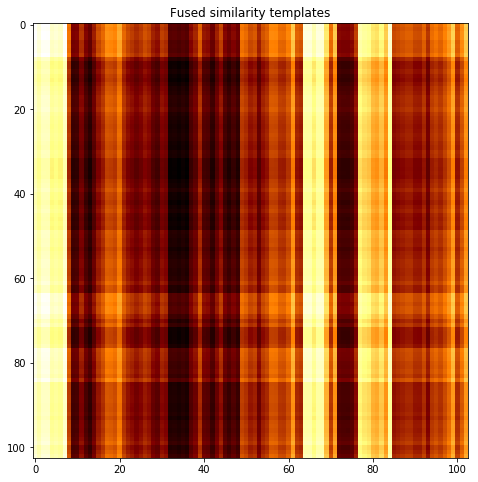

subject 31; gesture 1_1_2


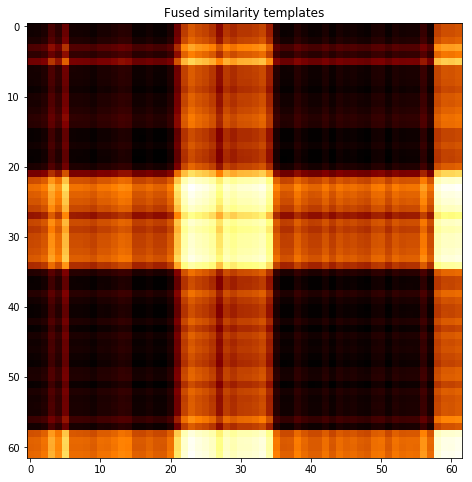

subject 31; gesture 1_1_1


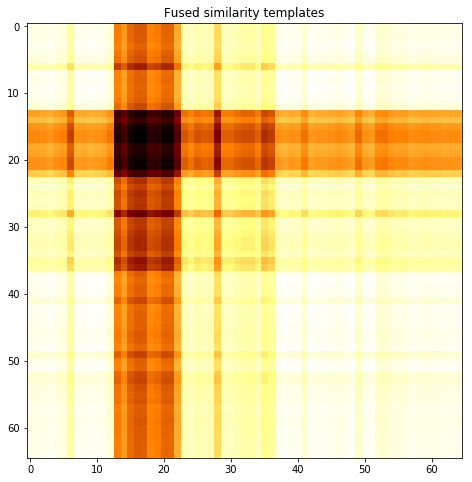

subject 31; gesture 1_0_1


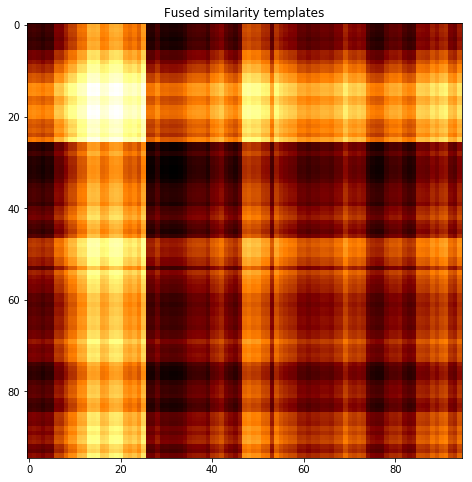

subject 31; gesture 1_0_2


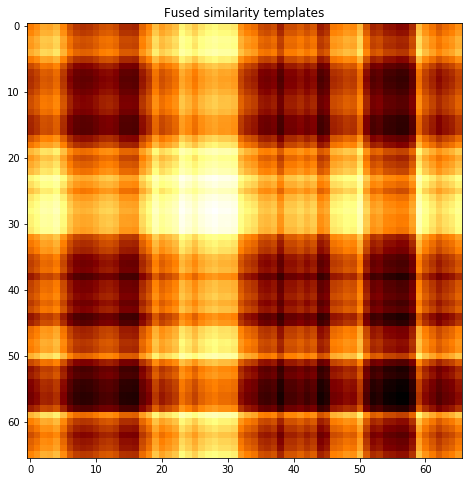

subject 13; gesture 1_1_2


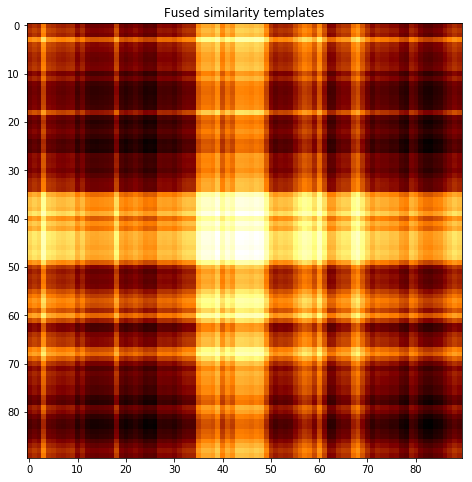

subject 13; gesture 1_1_1


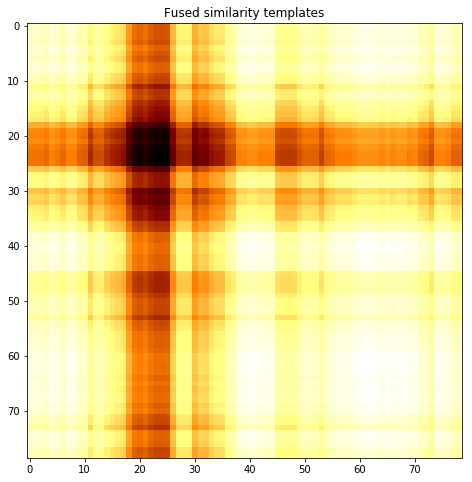

subject 13; gesture 1_0_1


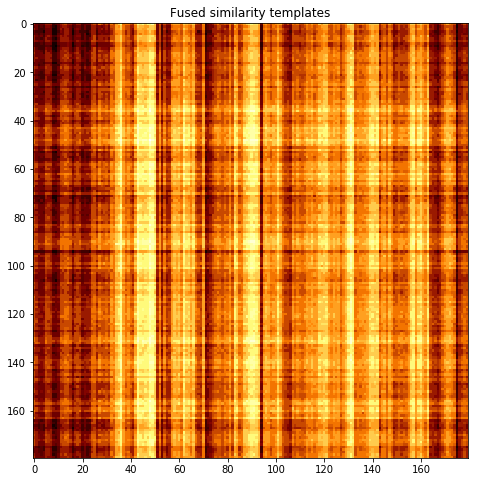

subject 13; gesture 1_0_2


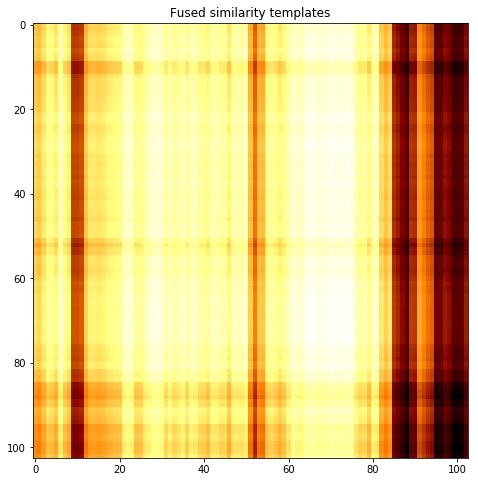

subject 36; gesture 1_1_2


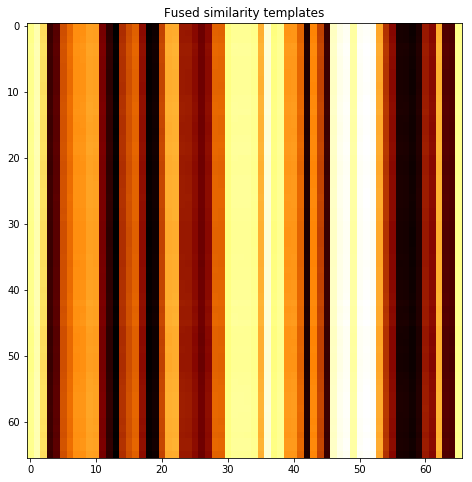

subject 36; gesture 1_1_1


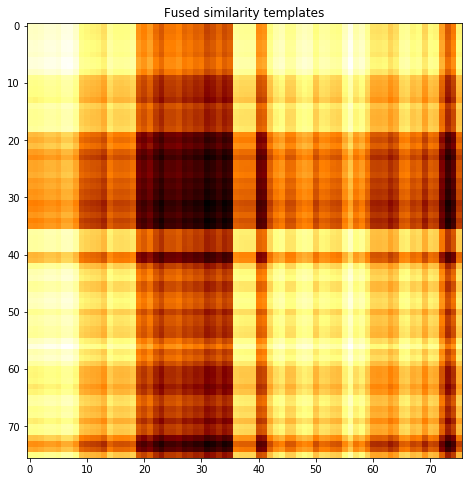

subject 36; gesture 1_0_1


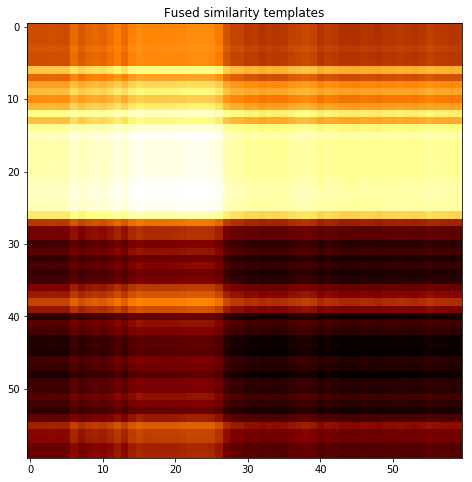

subject 36; gesture 1_0_2


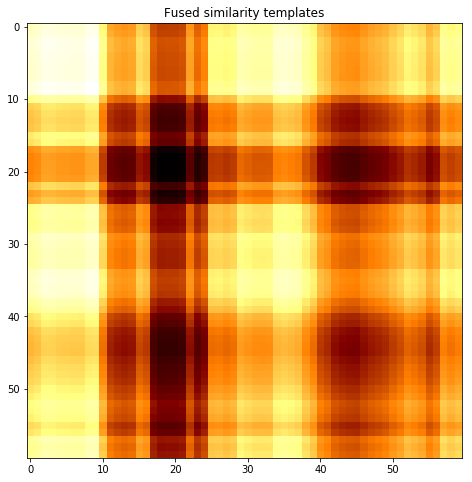

subject 24; gesture 1_1_2


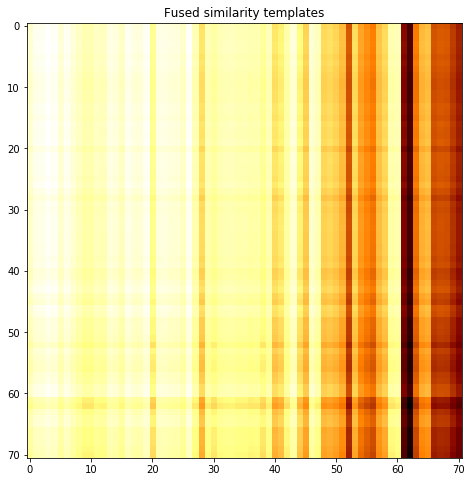

subject 24; gesture 1_1_1


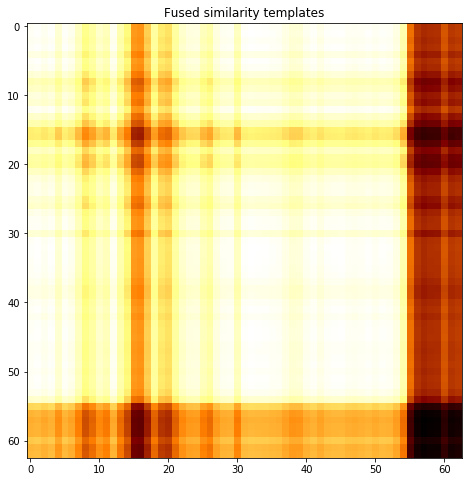

subject 24; gesture 1_0_1


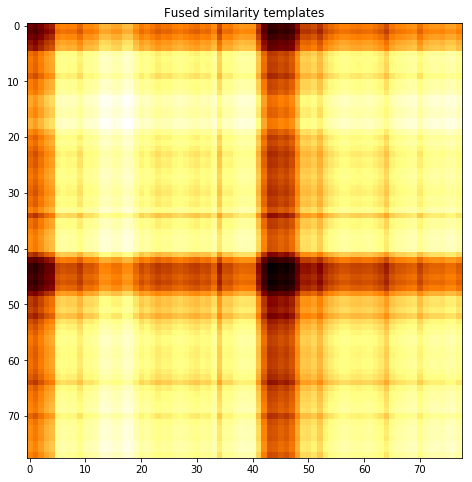

subject 24; gesture 1_0_2


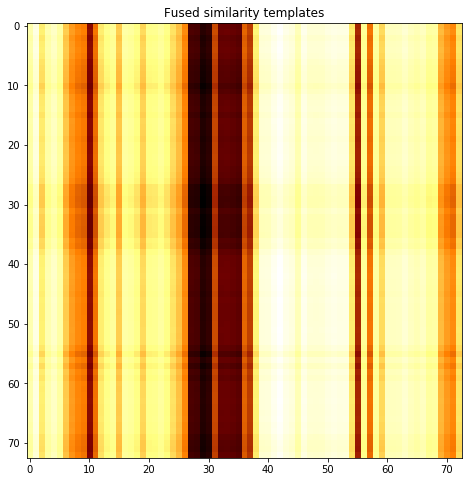

subject 33; gesture 1_1_2


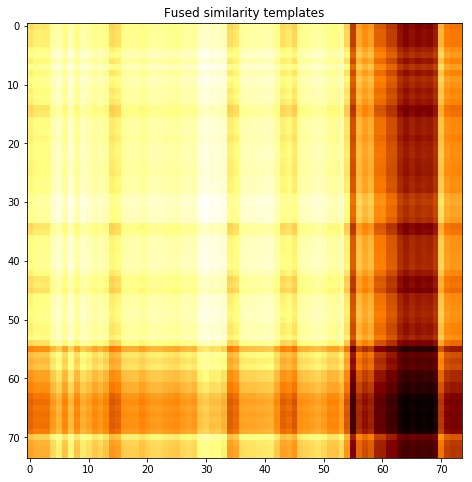

subject 33; gesture 1_1_1


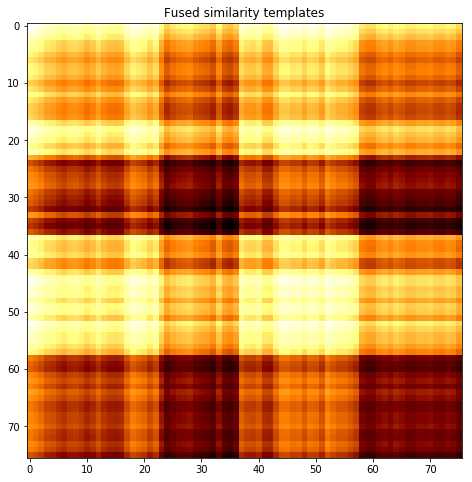

subject 33; gesture 1_0_1


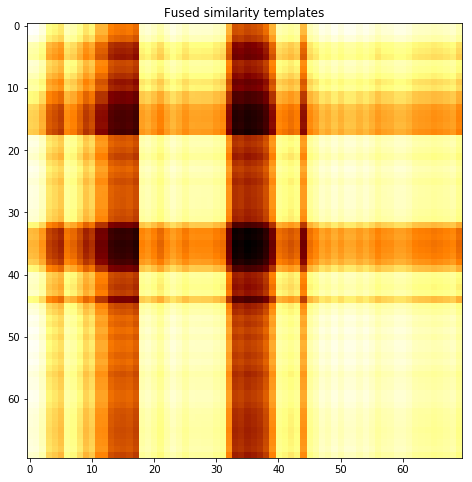

subject 33; gesture 1_0_2


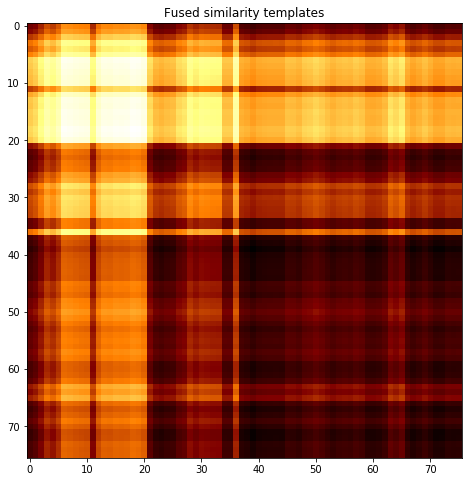

subject 11; gesture 1_1_2


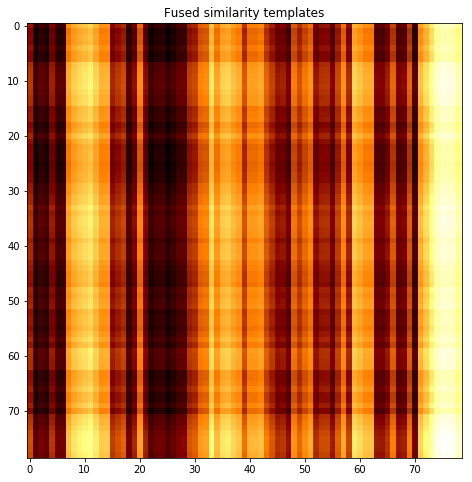

subject 11; gesture 1_1_1


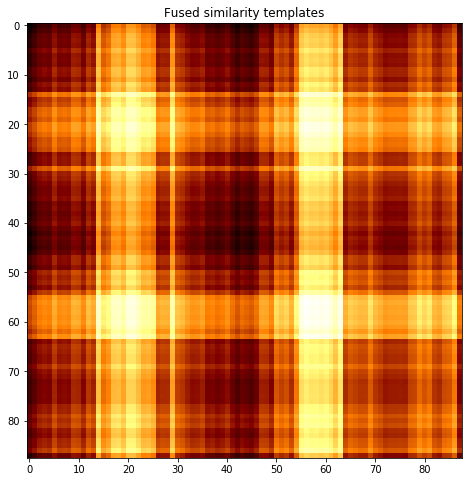

subject 11; gesture 1_0_1


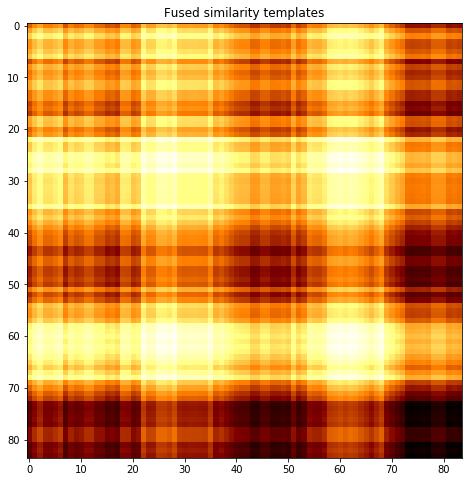

subject 11; gesture 1_0_2


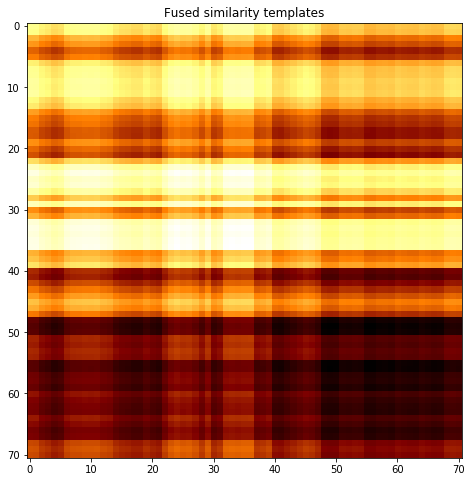

subject 35; gesture 1_1_2


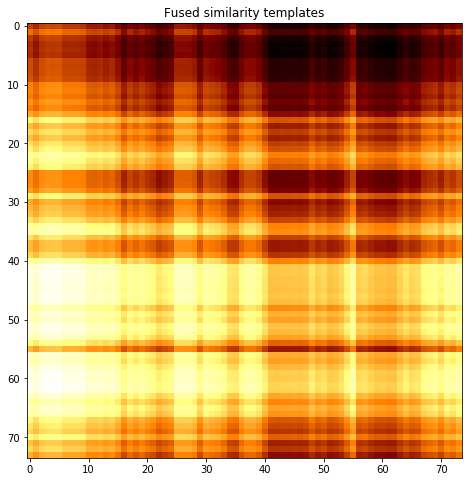

subject 35; gesture 1_1_1


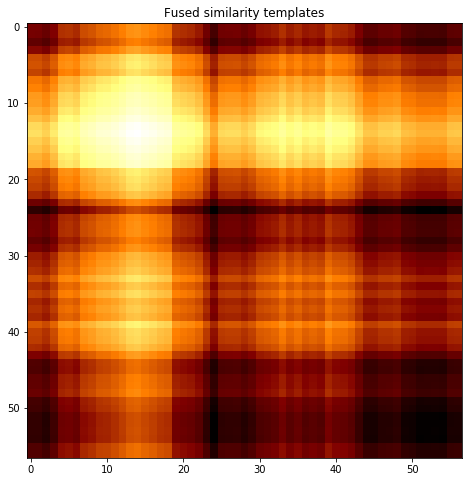

subject 35; gesture 1_0_1


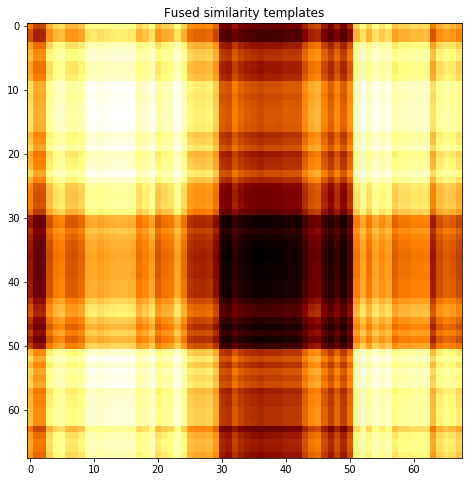

subject 35; gesture 1_0_2


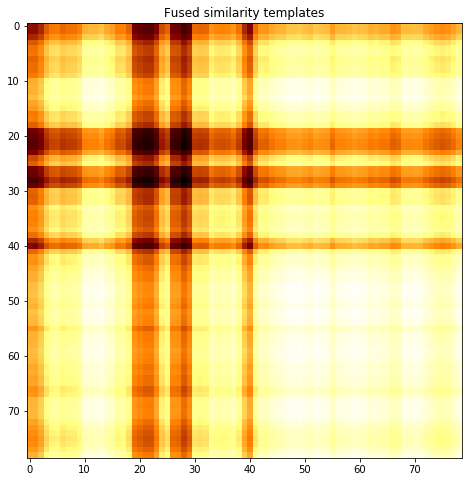

subject 22; gesture 1_1_2


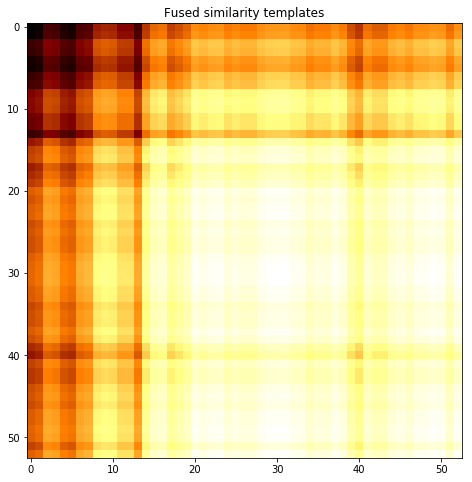

subject 22; gesture 1_1_1


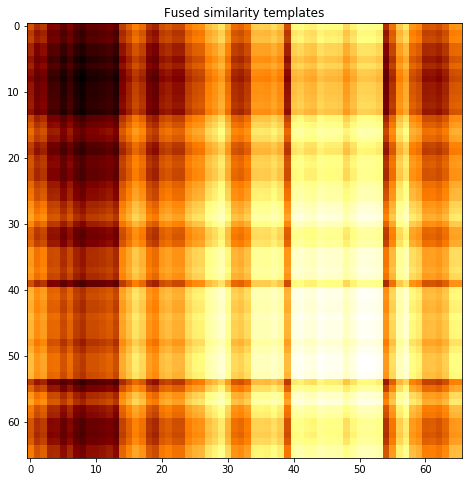

subject 22; gesture 1_0_1


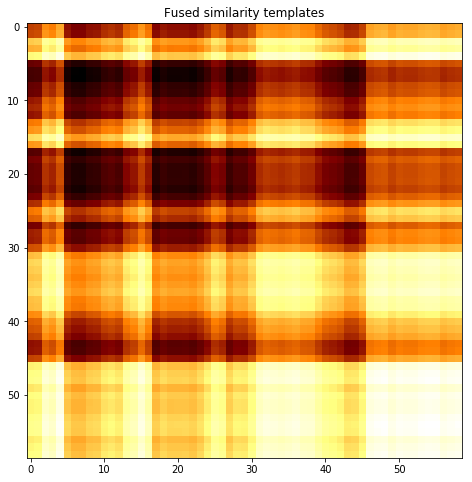

subject 22; gesture 1_0_2


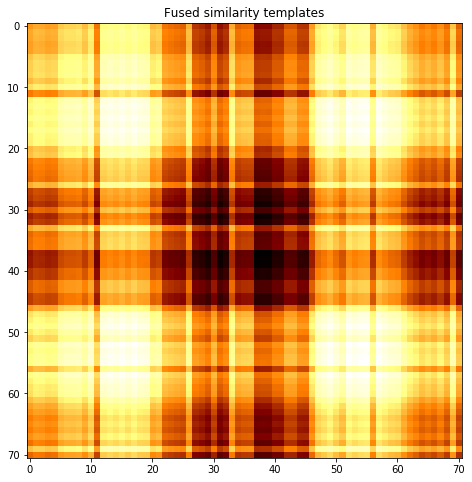

subject 34; gesture 1_1_2


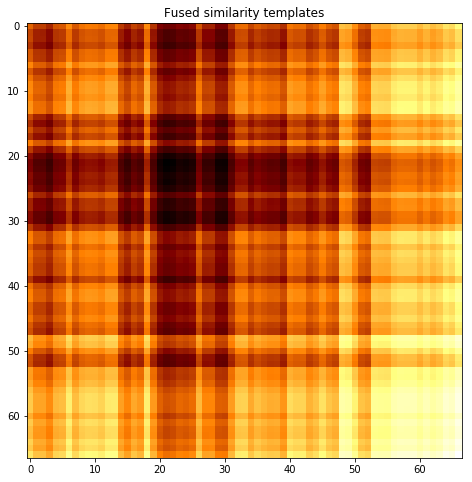

subject 34; gesture 1_1_1


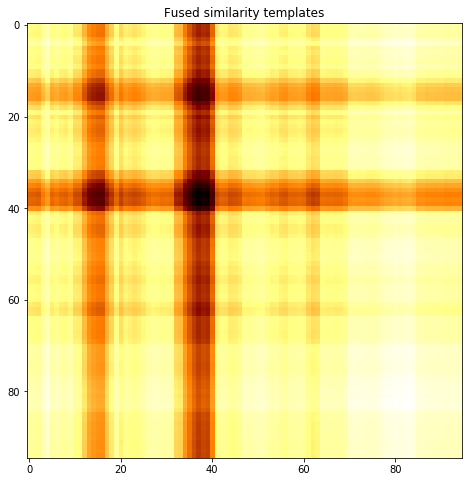

subject 34; gesture 1_0_1


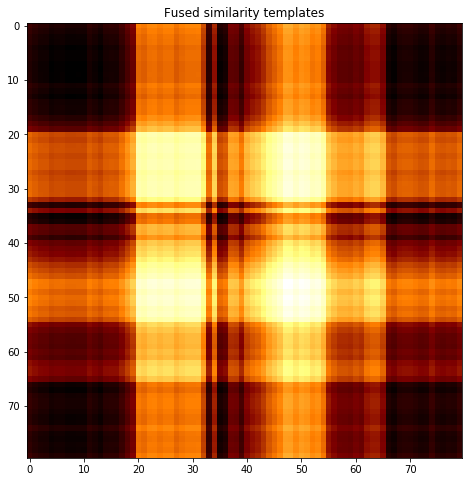

subject 34; gesture 1_0_2


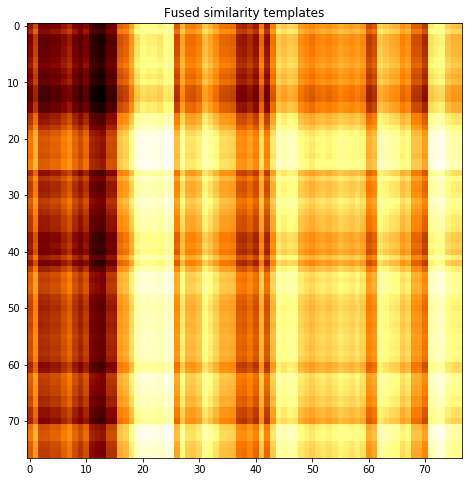

subject 10; gesture 1_1_2


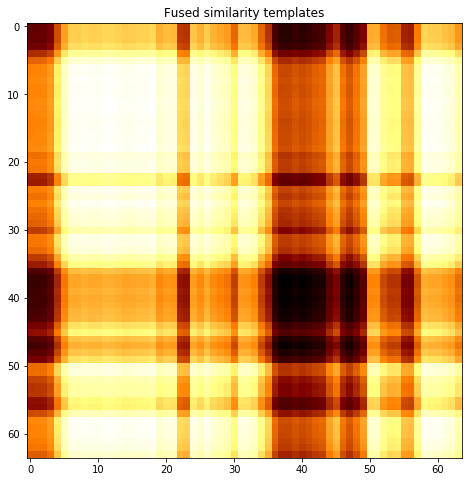

subject 10; gesture 1_1_1


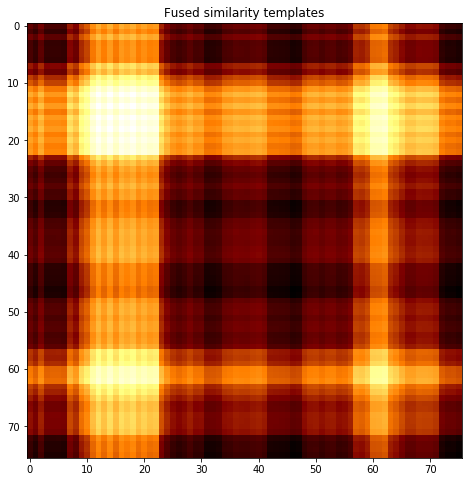

subject 10; gesture 1_0_1


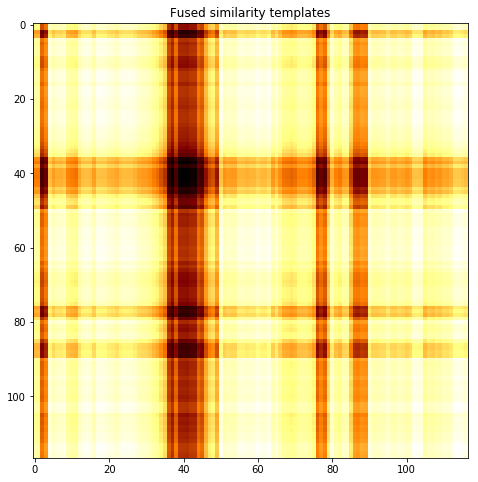

subject 10; gesture 1_0_2


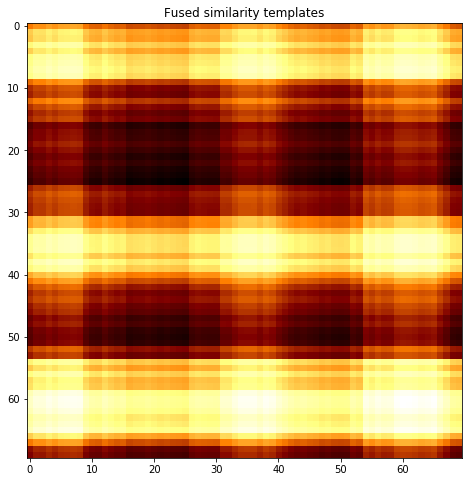

subject 02; gesture 1_1_2


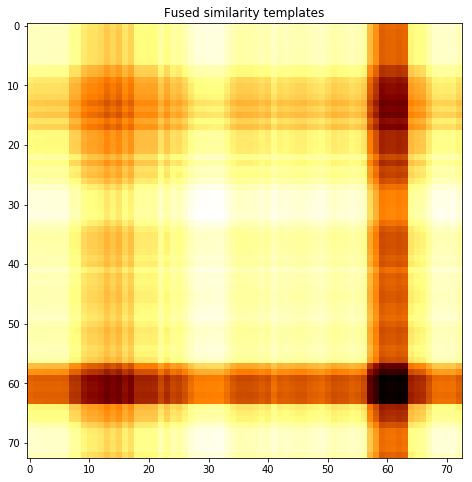

subject 02; gesture 1_1_1


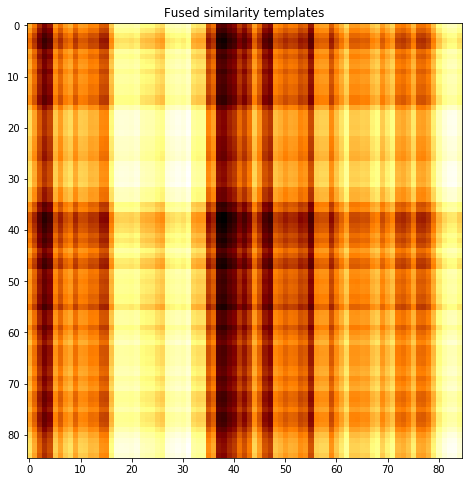

subject 02; gesture 1_0_1


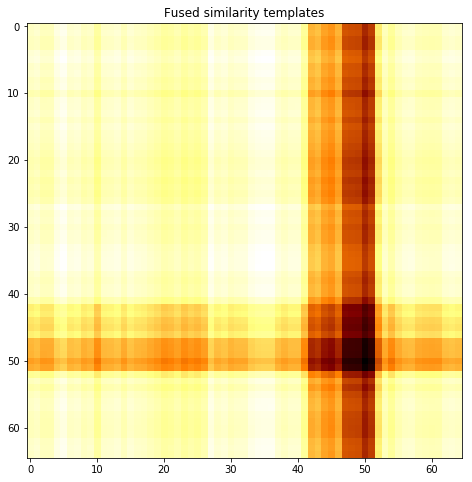

subject 02; gesture 1_0_2


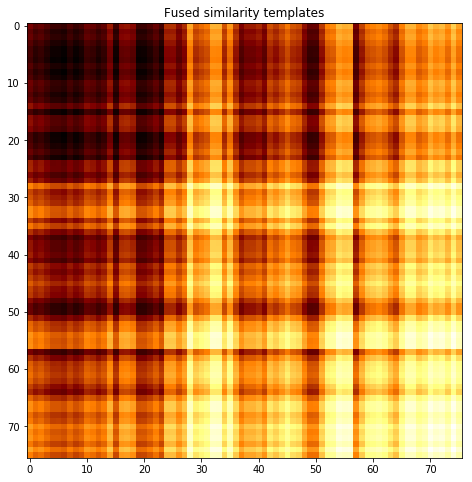

In [4]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

static w/ 25 iters

subject 05; gesture 1_0_1

subject 23; gesture 1_1_2

subject 25; gesture 1_0_1

subject 29; gesture 1_1_1

subject 12; gesture 1_1_2

subject 31; gesture 1_1_2

subject 24; gesture 1_1_1

Problem cases w/ 20 iters:

subject 21; gesture 1_0_1

subject 21; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.01180314928020855; sd 8.158616902347362e-09
subject 30; gesture 1_1_2; PoV: 0.9999999999814493


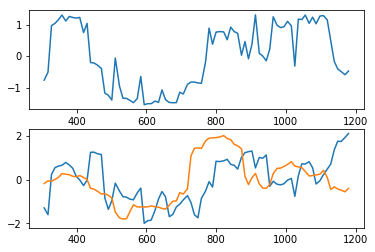

subject 30; gesture 1_1_1; avg 0.01169517227550341; sd 5.654344944840388e-14
subject 30; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


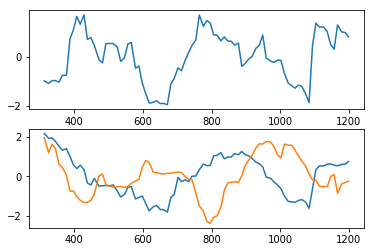

subject 30; gesture 1_0_1; avg 0.010685679112642385; sd 1.0045648957973126e-13
subject 30; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


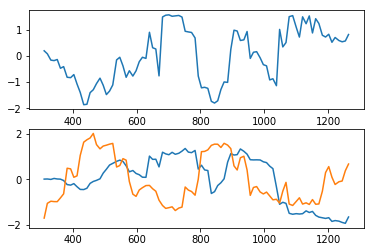

subject 30; gesture 1_0_2; avg 0.012828159406949558; sd 5.3524157926627995e-09
subject 30; gesture 1_0_2; PoV: 0.9999999999534075


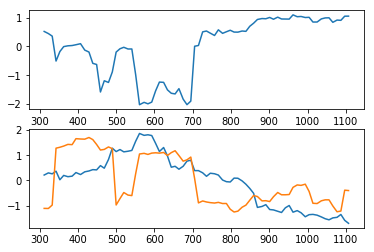

subject 06; gesture 1_1_2; avg 0.027276496290851302; sd 1.3185314073369955e-08
subject 06; gesture 1_1_2; PoV: 0.9999999998974495


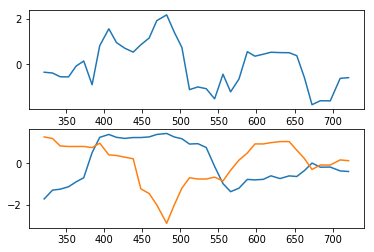

subject 06; gesture 1_1_1; avg 0.013574911432341396; sd 3.581801771506037e-08
subject 06; gesture 1_1_1; PoV: 0.9999999983506809


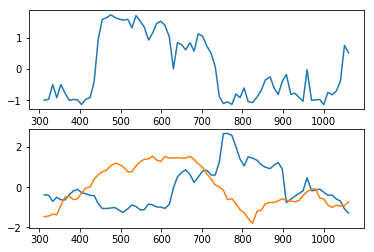

subject 06; gesture 1_0_1; avg 0.015061412357349029; sd 3.756934549070478e-15
subject 06; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


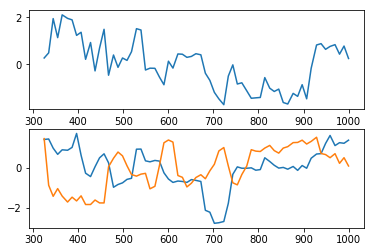

subject 06; gesture 1_0_2; avg 0.01875782383362745; sd 7.357844413884559e-10
subject 06; gesture 1_0_2; PoV: 0.9999999999998794


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


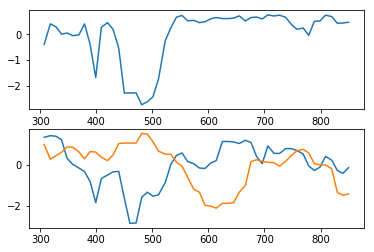

subject 09; gesture 1_1_2; avg 0.013628564661481525; sd 1.2737797835538681e-10
subject 09; gesture 1_1_2; PoV: 0.9999999999999917


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


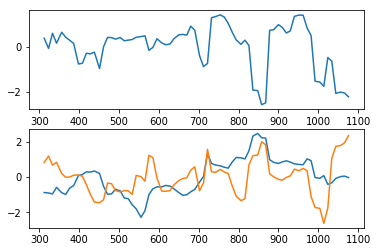

subject 09; gesture 1_1_1; avg 0.015346127100996275; sd 7.121752125266492e-08
subject 09; gesture 1_1_1; PoV: 0.9999999882072576


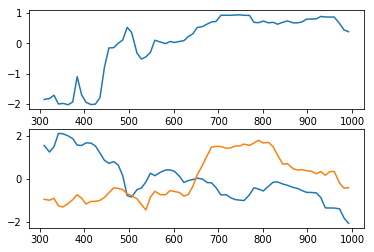

subject 09; gesture 1_0_1; avg 0.011800248150117749; sd 1.9084546250997953e-13
subject 09; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


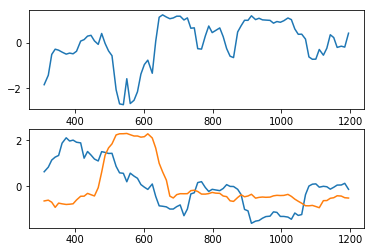

subject 09; gesture 1_0_2; avg 0.014290376897111625; sd 1.0937464256998823e-15
subject 09; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


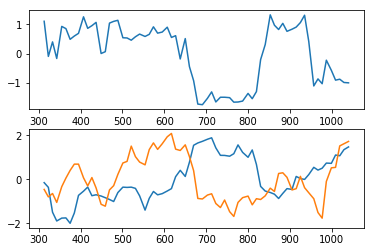

subject 03; gesture 1_1_2; avg 0.013202800924601485; sd 4.634216596400316e-12
subject 03; gesture 1_1_2; PoV: 0.9999999999999991


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


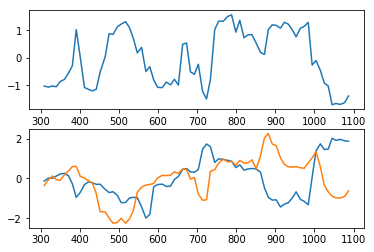

subject 03; gesture 1_1_1; avg 0.01845668530739453; sd 2.237122854784308e-05
subject 03; gesture 1_1_1; PoV: 0.9997872287813508


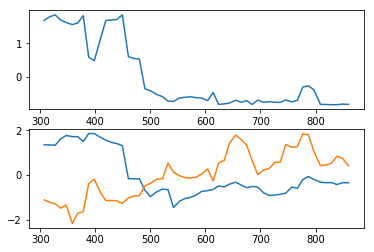

subject 03; gesture 1_0_1; avg 0.014266007111263133; sd 3.269046794818567e-08
subject 03; gesture 1_0_1; PoV: 0.999999999638766


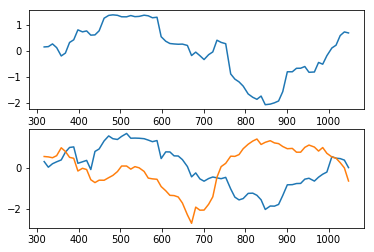

subject 03; gesture 1_0_2; avg 0.01617436207600981; sd 8.624547548056882e-09
subject 03; gesture 1_0_2; PoV: 0.9999999999840559


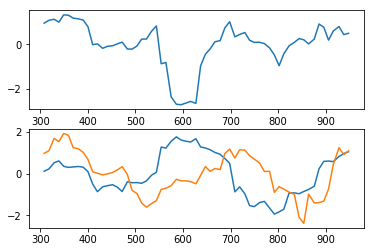

subject 05; gesture 1_1_2; avg 0.018044640493194198; sd 5.338484853751317e-08
subject 05; gesture 1_1_2; PoV: 0.999999999171175


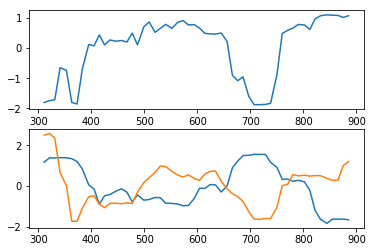

subject 05; gesture 1_1_1; avg 0.017850797299443843; sd 2.0299241260100923e-10
subject 05; gesture 1_1_1; PoV: 0.9999999999997051


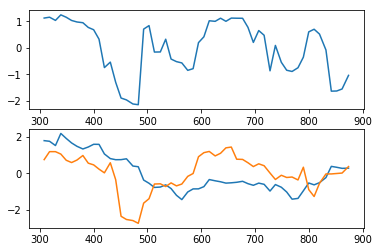

subject 05; gesture 1_0_1; avg 0.011527521714331105; sd 1.2208705844473183e-11
subject 05; gesture 1_0_1; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


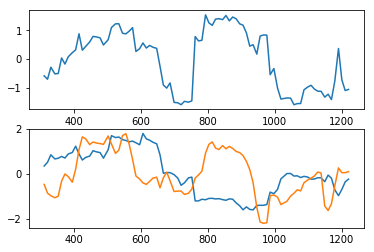

subject 05; gesture 1_0_2; avg 0.015090954747960707; sd 1.0071455884447872e-08
subject 05; gesture 1_0_2; PoV: 0.9999999999906293


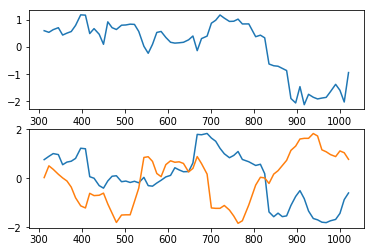

subject 21; gesture 1_1_2; avg 0.013931429259074132; sd 3.322044861860889e-11
subject 21; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


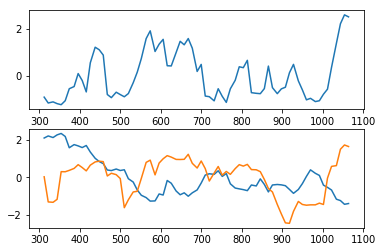

subject 21; gesture 1_1_1; avg 0.016066431968456217; sd 0.01111998728221645
subject 21; gesture 1_1_1; PoV: 0.5977197325003542


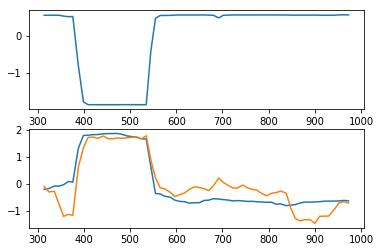

subject 21; gesture 1_0_1; avg 0.016918885259344766; sd 9.274252324345661e-10
subject 21; gesture 1_0_1; PoV: 0.9999999999994982


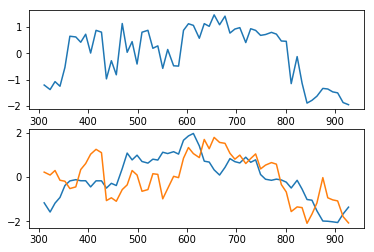

subject 21; gesture 1_0_2; avg 0.017305184540332426; sd 5.056931901834929e-08
subject 21; gesture 1_0_2; PoV: 0.9999999993574566


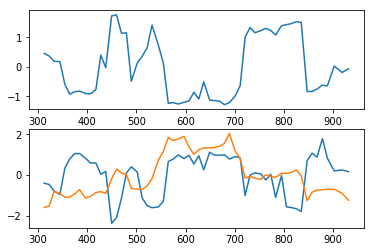

subject 17; gesture 1_1_2; avg 0.013532870869182893; sd 2.7224723457509924e-10
subject 17; gesture 1_1_2; PoV: 0.9999999999999685


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


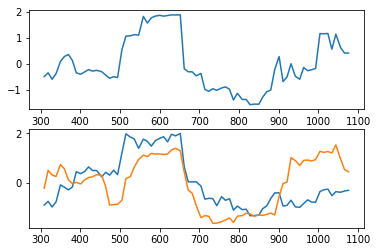

subject 17; gesture 1_1_1; avg 0.01604003056968279; sd 8.251949434636954e-12
subject 17; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


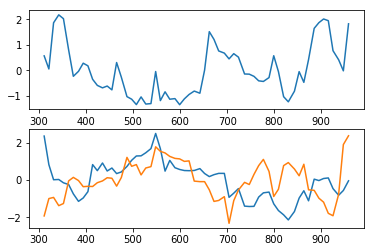

subject 17; gesture 1_0_1; avg 0.014168734982485153; sd 7.38560530208655e-11
subject 17; gesture 1_0_1; PoV: 0.9999999999999872


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


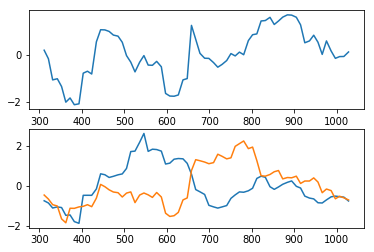

subject 17; gesture 1_0_2; avg 0.016161209795397233; sd 1.6770168386870946e-06
subject 17; gesture 1_0_2; PoV: 0.999996898402633


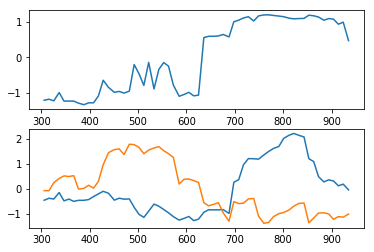

subject 01; gesture 1_1_2; avg 0.015574978946425844; sd 2.335943507841246e-08
subject 01; gesture 1_1_2; PoV: 0.9999999949655722


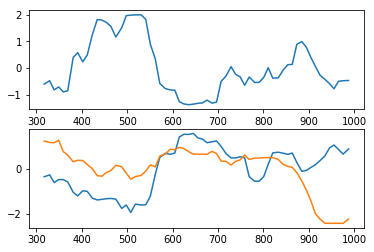

subject 01; gesture 1_1_1; avg 0.014540010426485358; sd 4.582970624366072e-13
subject 01; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


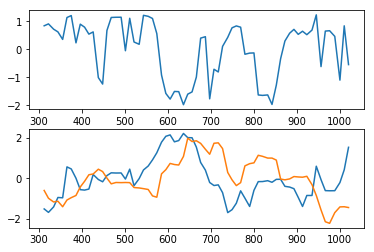

subject 01; gesture 1_0_1; avg 0.010999924457846567; sd 1.3674129136062398e-12
subject 01; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


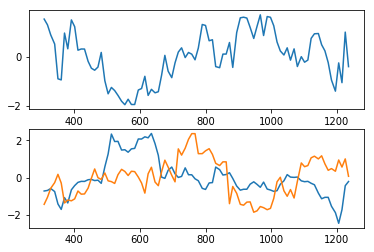

subject 01; gesture 1_0_2; avg 0.012194363294561382; sd 1.33765377083132e-14
subject 01; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


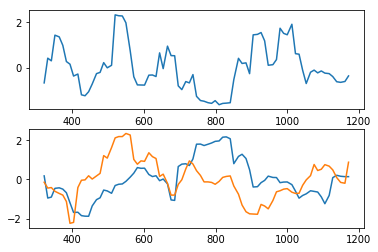

subject 16; gesture 1_1_2; avg 0.01927639782787577; sd 3.712813102307399e-07
subject 16; gesture 1_1_2; PoV: 0.9999988152650648


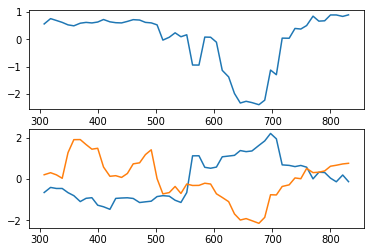

subject 16; gesture 1_1_1; avg 0.013768151298118363; sd 7.901546144175369e-08
subject 16; gesture 1_1_1; PoV: 0.999999998735797


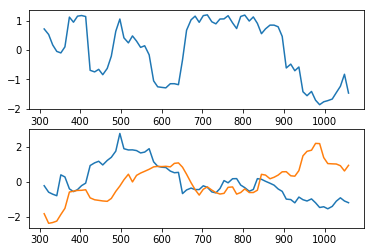

subject 16; gesture 1_0_1; avg 0.02123128958108659; sd 2.096858082775717e-10
subject 16; gesture 1_0_1; PoV: 0.9999999999999415


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


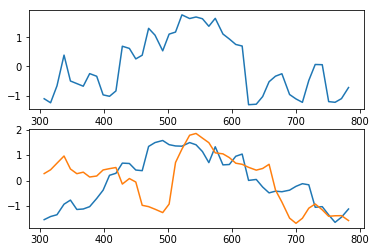

subject 16; gesture 1_0_2; avg 0.018320407139447395; sd 3.026583470394803e-07
subject 16; gesture 1_0_2; PoV: 0.9999999742607291


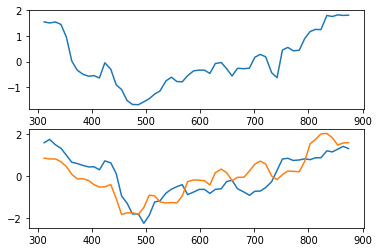

subject 26; gesture 1_1_2; avg 0.01794571450225149; sd 6.0795736850460124e-09
subject 26; gesture 1_1_2; PoV: 0.9999999999836798


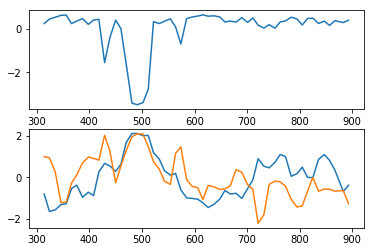

subject 26; gesture 1_1_1; avg 0.01827463810993128; sd 5.929501266888306e-07
subject 26; gesture 1_1_1; PoV: 0.9999999655879708


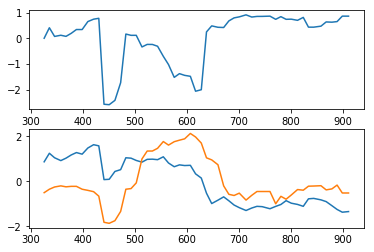

subject 26; gesture 1_0_1; avg 0.005040894094597782; sd 1.3806451383794736e-18
subject 26; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


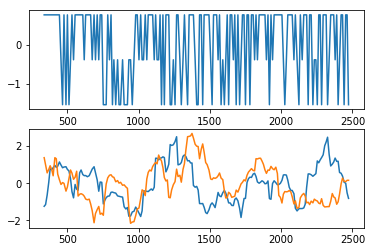

subject 26; gesture 1_0_2; avg 0.014986260134435922; sd 1.371443979157903e-10
subject 26; gesture 1_0_2; PoV: 0.9999999999999755


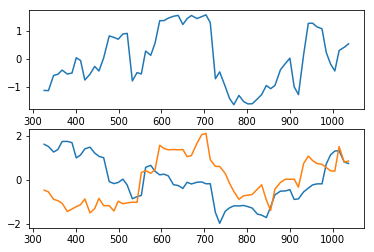

subject 32; gesture 1_1_2; avg 0.012993070854566555; sd 1.847421552002851e-13
subject 32; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


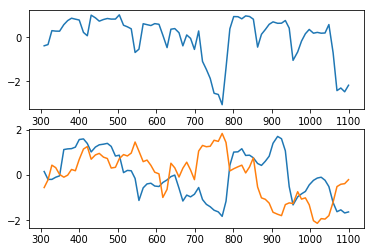

subject 32; gesture 1_1_1; avg 0.016390617504360626; sd 0.0008048113458477754
subject 32; gesture 1_1_1; PoV: 0.986978527791542


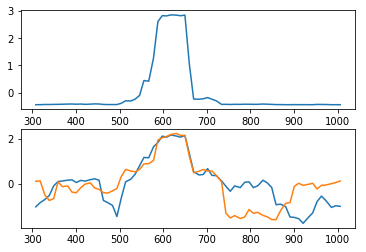

subject 32; gesture 1_0_1; avg 0.014300600044886789; sd 8.548878442623064e-13
subject 32; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


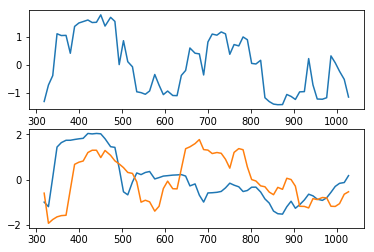

subject 32; gesture 1_0_2; avg 0.016990042228647355; sd 2.270453971965776e-08
subject 32; gesture 1_0_2; PoV: 0.9999999972679852


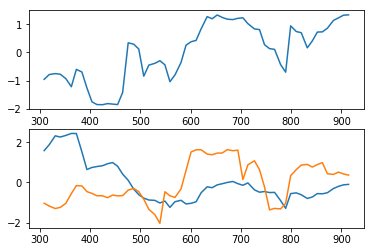

subject 04; gesture 1_1_2; avg 0.013949758852909699; sd 4.70346732798783e-06
subject 04; gesture 1_1_2; PoV: 0.9999933883135229


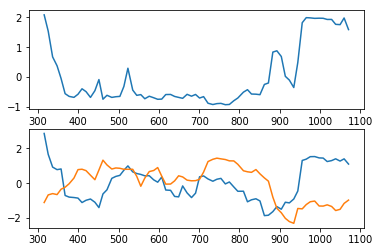

subject 04; gesture 1_1_1; avg 0.01453083413156608; sd 9.94754903823954e-09
subject 04; gesture 1_1_1; PoV: 0.999999999577458


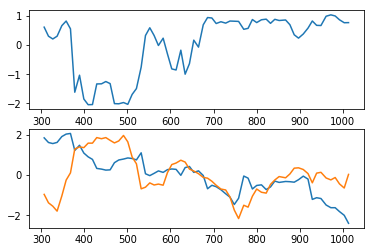

subject 04; gesture 1_0_1; avg 0.017111888661851645; sd 1.8202271241252593e-08
subject 04; gesture 1_0_1; PoV: 0.9999999992011763


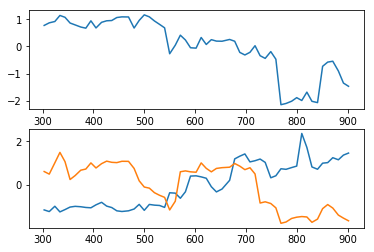

subject 04; gesture 1_0_2; avg 0.015819615644040608; sd 4.9946458308432e-13
subject 04; gesture 1_0_2; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


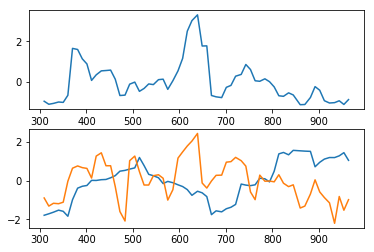

subject 08; gesture 1_1_2; avg 0.013516789202347586; sd 1.2795538039281696e-14


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 08; gesture 1_1_2; PoV: 1.0


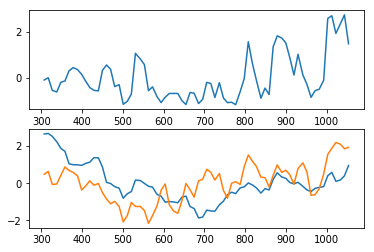

subject 08; gesture 1_1_1; avg 0.016313909697145287; sd 3.663500897279512e-09
subject 08; gesture 1_1_1; PoV: 0.9999999999968564


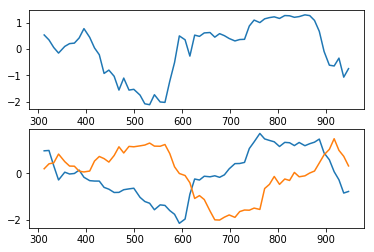

subject 08; gesture 1_0_1; avg 0.015159532524727458; sd 2.9694540151281307e-10
subject 08; gesture 1_0_1; PoV: 0.9999999999994099


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


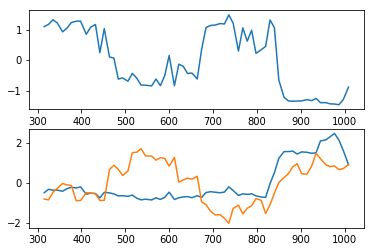

subject 08; gesture 1_0_2; avg 0.016198827899128767; sd 1.3143612679620352e-13
subject 08; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


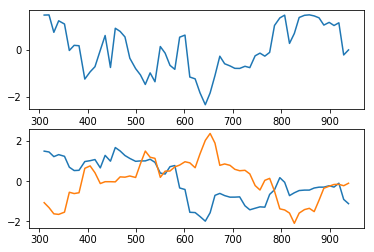

subject 27; gesture 1_1_2; avg 0.014398511033530209; sd 4.290068890664211e-08
subject 27; gesture 1_1_2; PoV: 0.9999999939372235


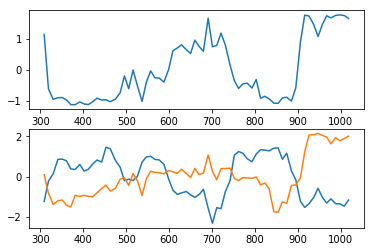

subject 27; gesture 1_1_1; avg 0.010438617279537253; sd 3.2905405900405924e-13
subject 27; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


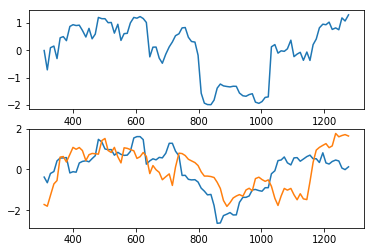

subject 27; gesture 1_0_1; avg 0.014670284392263307; sd 8.61138364358794e-08
subject 27; gesture 1_0_1; PoV: 0.9999999970228738


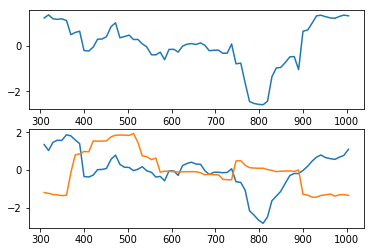

subject 27; gesture 1_0_2; avg 0.01551161276616895; sd 2.195095587545971e-15
subject 27; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


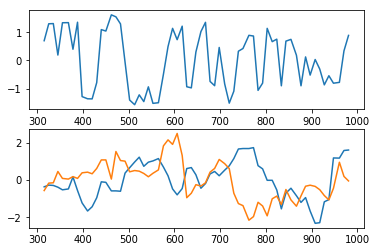

subject 14; gesture 1_1_2; avg 0.013402484271675032; sd 5.386263127346839e-11
subject 14; gesture 1_1_2; PoV: 0.9999999999999967


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


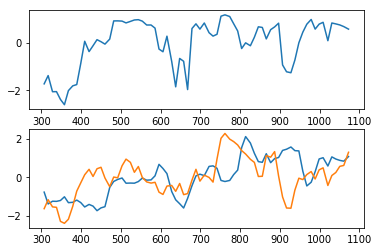

subject 14; gesture 1_1_1; avg 0.01964786099300772; sd 9.62810258654926e-16
subject 14; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


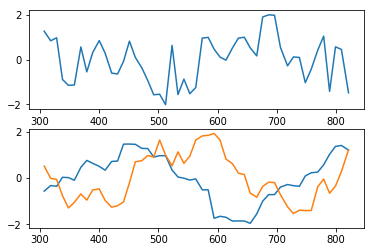

subject 14; gesture 1_0_1; avg 0.012783426775760331; sd 3.568629132036549e-13
subject 14; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


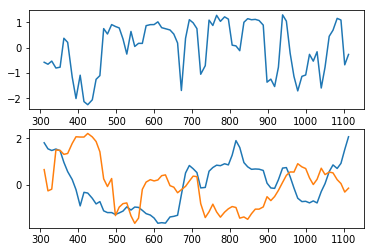

subject 14; gesture 1_0_2; avg 0.014259932308132018; sd 5.7139378412880184e-11
subject 14; gesture 1_0_2; PoV: 0.999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


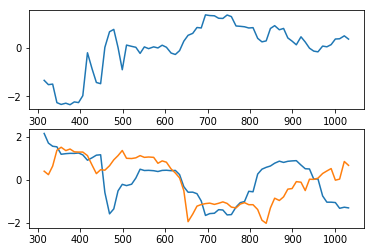

subject 23; gesture 1_1_2; avg 0.013045735465067246; sd 3.2048337830570546e-11
subject 23; gesture 1_1_2; PoV: 0.999999999999994


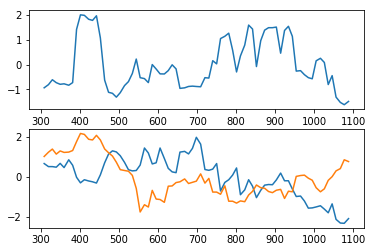

subject 23; gesture 1_1_1; avg 0.011854246478295034; sd 1.0896404313359302e-06
subject 23; gesture 1_1_1; PoV: 0.999999484953376


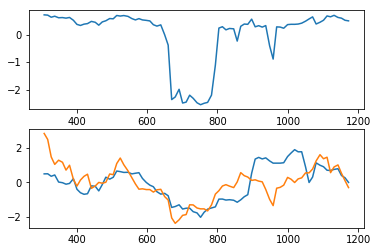

subject 23; gesture 1_0_1; avg 0.011991009380148207; sd 6.441826534801026e-11
subject 23; gesture 1_0_1; PoV: 0.9999999999999951


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


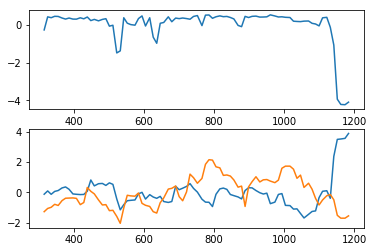

subject 23; gesture 1_0_2; avg 0.01441562452456802; sd 3.204516571506776e-11
subject 23; gesture 1_0_2; PoV: 0.9999999999999989


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


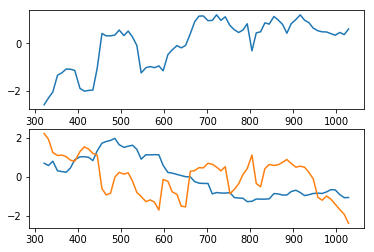

subject 25; gesture 1_1_2; avg 0.015919584075122988; sd 1.3706073836942405e-05
subject 25; gesture 1_1_2; PoV: 0.9997760359475386


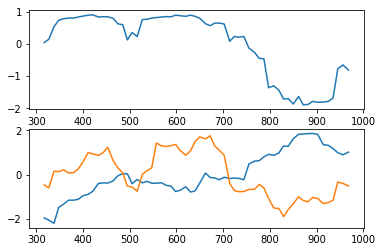

subject 25; gesture 1_1_1; avg 0.012200619401215869; sd 8.252037919016537e-13
subject 25; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


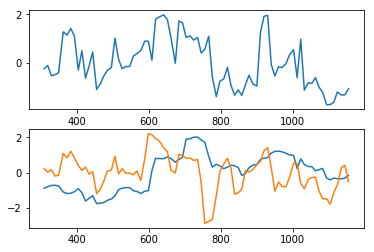

subject 25; gesture 1_0_1; avg 0.014768346794596463; sd 4.2527727179666506e-14
subject 25; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


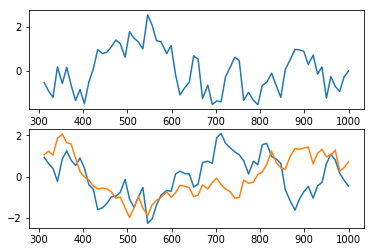

subject 25; gesture 1_0_2; avg 0.016287797014286533; sd 2.6055015226792965e-11
subject 25; gesture 1_0_2; PoV: 0.9999999999997498


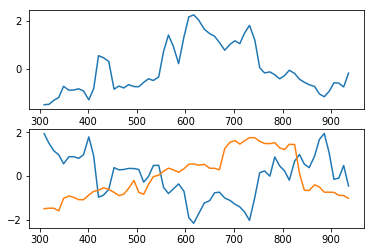

subject 18; gesture 1_1_2; avg 0.012585459157486056; sd 1.4914035768790567e-08
subject 18; gesture 1_1_2; PoV: 0.99999999730686


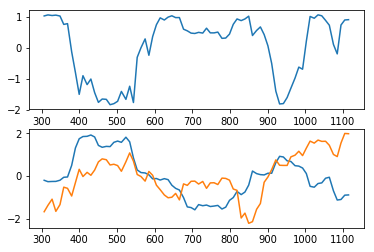

subject 18; gesture 1_1_1; avg 0.013174641994895646; sd 1.0122054975388607e-07
subject 18; gesture 1_1_1; PoV: 0.9999999962347643


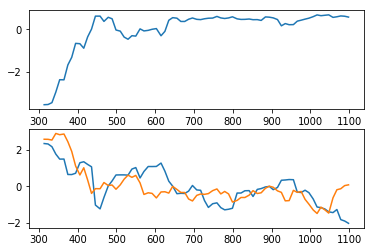

subject 18; gesture 1_0_1; avg 0.019116474365888574; sd 7.800883374886449e-05
subject 18; gesture 1_0_1; PoV: 0.999534890422108


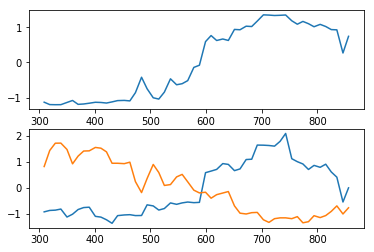

subject 18; gesture 1_0_2; avg 0.012368202955059186; sd 3.518542144879096e-08
subject 18; gesture 1_0_2; PoV: 0.999999993054736


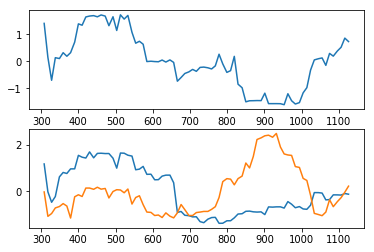

subject 29; gesture 1_1_2; avg 0.0155019816917819; sd 5.56869581992903e-09
subject 29; gesture 1_1_2; PoV: 0.9999999999953353


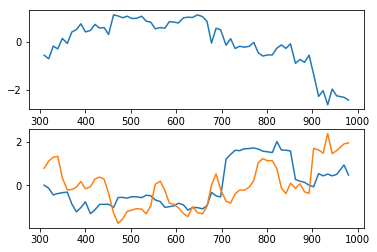

subject 29; gesture 1_1_1; avg 0.017895989620887103; sd 5.152468626917718e-15
subject 29; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


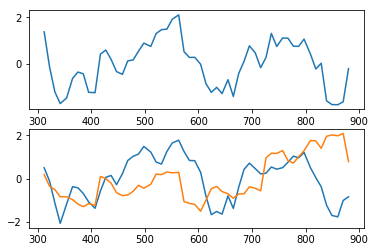

subject 29; gesture 1_0_1; avg 0.015408097462772781; sd 4.86545833230332e-08
subject 29; gesture 1_0_1; PoV: 0.9999999997623435


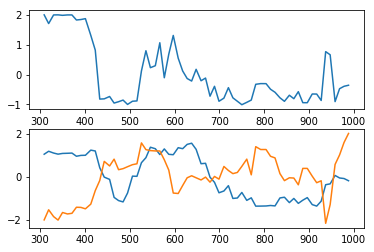

subject 29; gesture 1_0_2; avg 0.01486393917402635; sd 2.4517987084859626e-05
subject 29; gesture 1_0_2; PoV: 0.9999025135527938


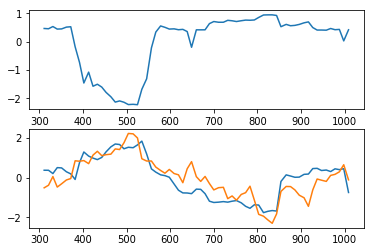

subject 15; gesture 1_1_2; avg 0.012901032056974954; sd 4.266563151373707e-07
subject 15; gesture 1_1_2; PoV: 0.999999985817104


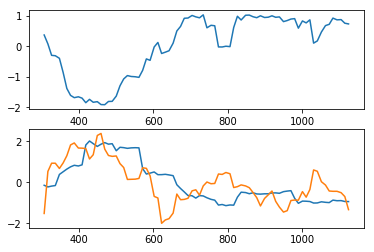

subject 15; gesture 1_1_1; avg 0.015896215684415464; sd 1.7270160369232536e-14
subject 15; gesture 1_1_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


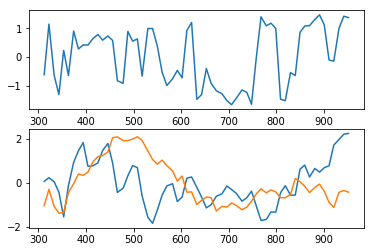

subject 15; gesture 1_0_1; avg 0.01701831725812402; sd 1.1075580629648105e-08
subject 15; gesture 1_0_1; PoV: 0.9999999991653944


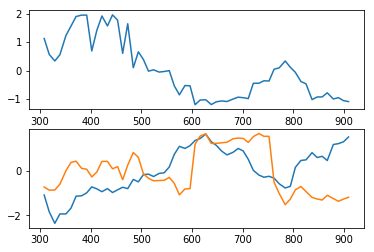

subject 15; gesture 1_0_2; avg 0.015553657905424328; sd 4.739948271886615e-13
subject 15; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


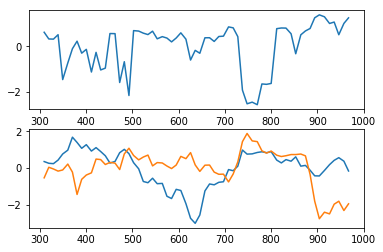

subject 28; gesture 1_1_2; avg 0.02063199550966546; sd 5.956086535855401e-09
subject 28; gesture 1_1_2; PoV: 0.999999999993844


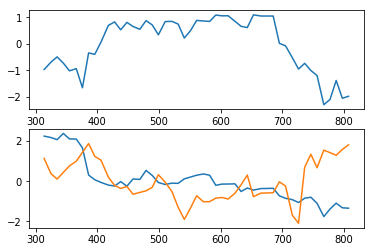

subject 28; gesture 1_1_1; avg 0.02526040672889381; sd 3.809296822366052e-10
subject 28; gesture 1_1_1; PoV: 0.9999999999999715


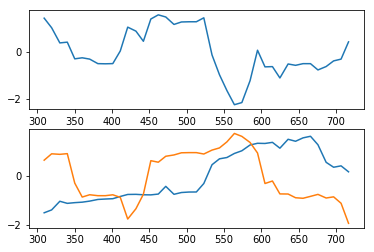

subject 28; gesture 1_0_1; avg 0.018671323545245918; sd 1.5406797972828163e-05
subject 28; gesture 1_0_1; PoV: 0.9998956997245692


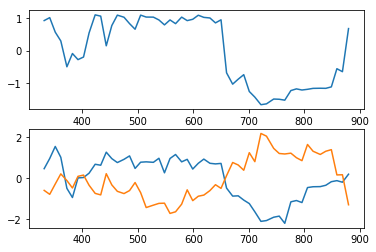

subject 28; gesture 1_0_2; avg 0.016823877280250917; sd 3.8961581316456833e-08
subject 28; gesture 1_0_2; PoV: 0.9999999809799393


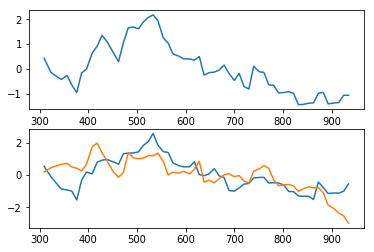

subject 12; gesture 1_1_2; avg 0.013499413302084241; sd 5.5723619986028785e-09
subject 12; gesture 1_1_2; PoV: 0.9999999999752281


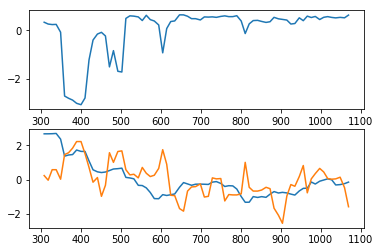

subject 12; gesture 1_1_1; avg 0.013779374897845507; sd 6.103314667669722e-15
subject 12; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


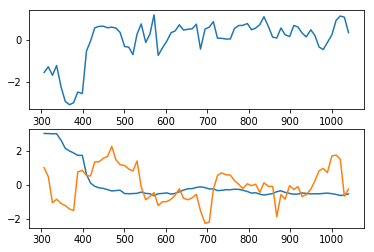

subject 12; gesture 1_0_1; avg 0.01354607699439426; sd 4.083874332696285e-10
subject 12; gesture 1_0_1; PoV: 0.9999999999996101


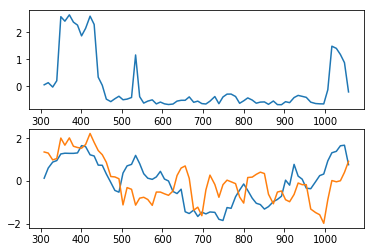

subject 12; gesture 1_0_2; avg 0.015804295660467666; sd 2.6443601465994204e-11
subject 12; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


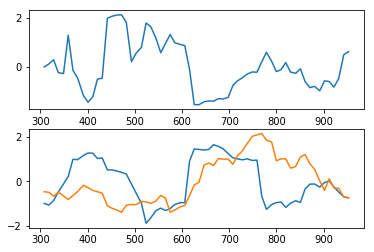

subject 19; gesture 1_1_2; avg 0.012967655191606415; sd 2.3773521300619775e-10
subject 19; gesture 1_1_2; PoV: 0.9999999999996361


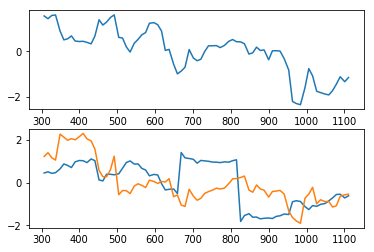

subject 19; gesture 1_1_1; avg 0.01662429491283127; sd 1.24463685755522e-10
subject 19; gesture 1_1_1; PoV: 0.9999999999999967


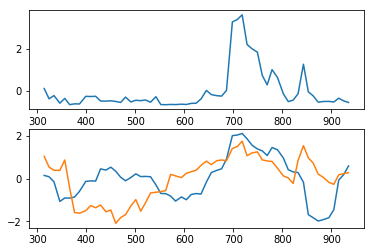

subject 19; gesture 1_0_1; avg 0.019363435883270875; sd 3.717931425823912e-09
subject 19; gesture 1_0_1; PoV: 0.999999999960773


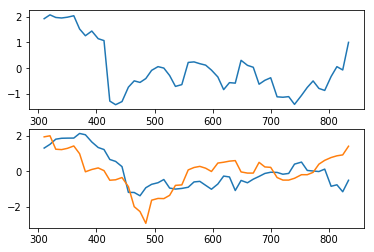

subject 19; gesture 1_0_2; avg 0.015829328205406515; sd 3.747377454942957e-12
subject 19; gesture 1_0_2; PoV: 0.9999999999999971


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


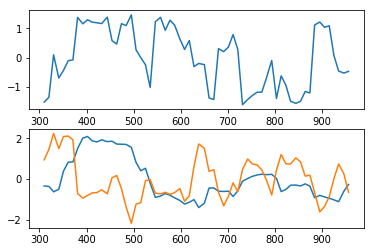

subject 07; gesture 1_1_2; avg 0.01208377620569061; sd 1.6027723634717083e-17
subject 07; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


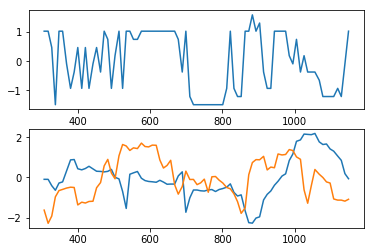

subject 07; gesture 1_1_1; avg 0.01458508903422157; sd 4.994531250272943e-09
subject 07; gesture 1_1_1; PoV: 0.9999999999601169


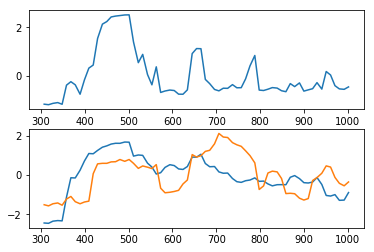

subject 07; gesture 1_0_1; avg 0.010901380414561119; sd 1.0203832376498433e-12
subject 07; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


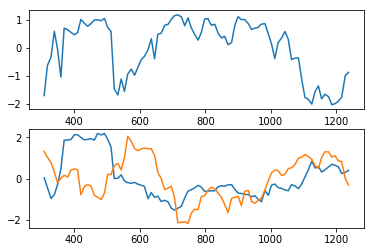

subject 07; gesture 1_0_2; avg 0.013608956467072967; sd 2.7451710226263272e-14
subject 07; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


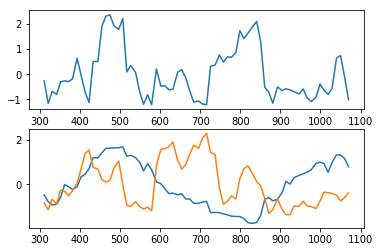

subject 20; gesture 1_1_2; avg 0.013220638481474192; sd 4.3067735826387816e-11
subject 20; gesture 1_1_2; PoV: 0.9999999999999984


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


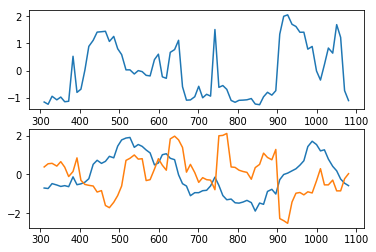

subject 20; gesture 1_1_1; avg 0.012507729660841408; sd 6.906135326819903e-14
subject 20; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


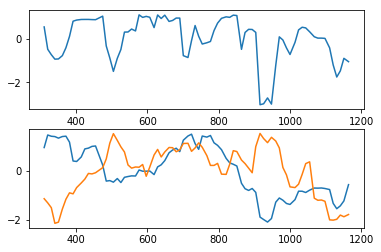

subject 20; gesture 1_0_1; avg 0.01272055845202268; sd 2.312953053106213e-18
subject 20; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


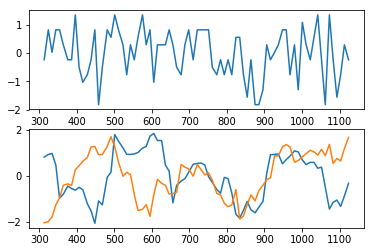

subject 20; gesture 1_0_2; avg 0.009728043125441819; sd 8.772609941715201e-16
subject 20; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


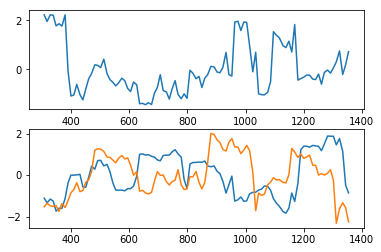

subject 31; gesture 1_1_2; avg 0.01616581162532289; sd 1.956674206442818e-06
subject 31; gesture 1_1_2; PoV: 0.9999886791194289


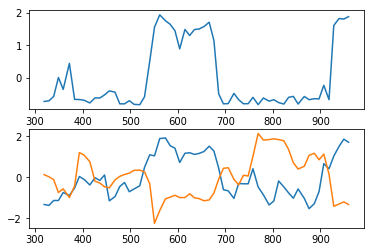

subject 31; gesture 1_1_1; avg 0.01562259179032684; sd 8.45778875407451e-07
subject 31; gesture 1_1_1; PoV: 0.9999998964532105


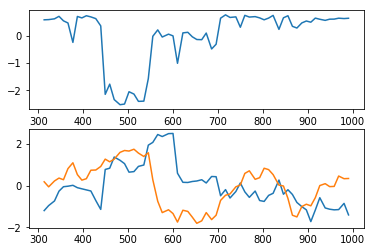

subject 31; gesture 1_0_1; avg 0.010565659618436574; sd 4.452176138167248e-14
subject 31; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


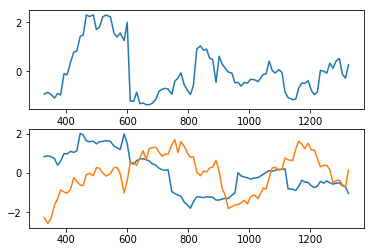

subject 31; gesture 1_0_2; avg 0.015207918279306521; sd 1.0318394440688181e-13
subject 31; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


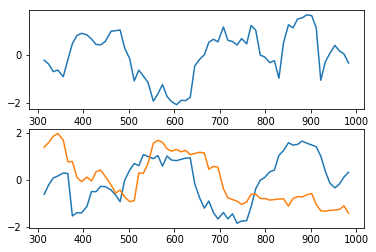

subject 13; gesture 1_1_2; avg 0.011123093654592485; sd 8.209632551409391e-11
subject 13; gesture 1_1_2; PoV: 0.9999999999999512


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


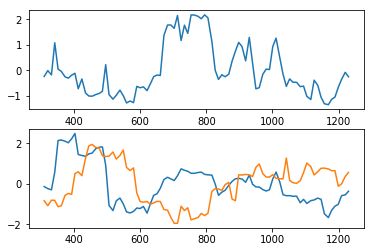

subject 13; gesture 1_1_1; avg 0.012868414943462879; sd 2.0256659132060504e-08
subject 13; gesture 1_1_1; PoV: 0.9999999999106018


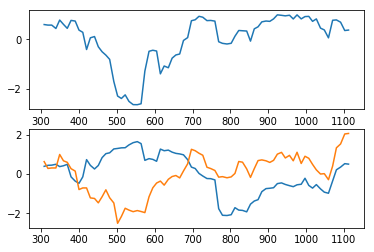

subject 13; gesture 1_0_1; avg 0.005568013995299069; sd 3.1324287166391026e-18
subject 13; gesture 1_0_1; PoV: 1.0000000000000004


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


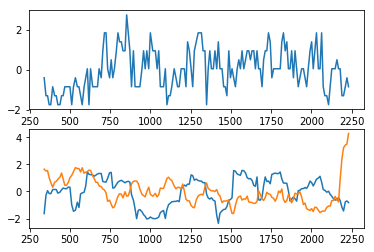

subject 13; gesture 1_0_2; avg 0.009717167271223542; sd 2.1498267615728083e-10
subject 13; gesture 1_0_2; PoV: 0.9999999999996071


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


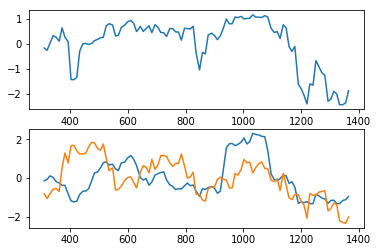

subject 36; gesture 1_1_2; avg 0.015173844127764301; sd 1.6563688013935628e-13
subject 36; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


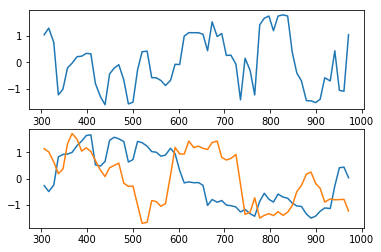

subject 36; gesture 1_1_1; avg 0.013288031448755276; sd 4.869290707190451e-12
subject 36; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


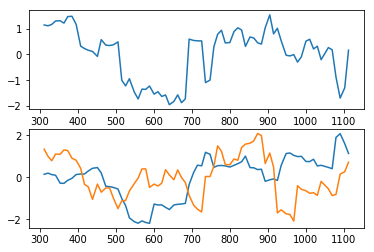

subject 36; gesture 1_0_1; avg 0.016958235181376725; sd 6.866078993192245e-08
subject 36; gesture 1_0_1; PoV: 0.9999999886569096


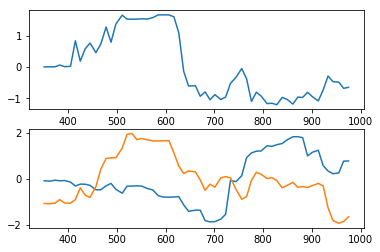

subject 36; gesture 1_0_2; avg 0.01680357608493174; sd 1.574212037840982e-09
subject 36; gesture 1_0_2; PoV: 0.9999999999983656


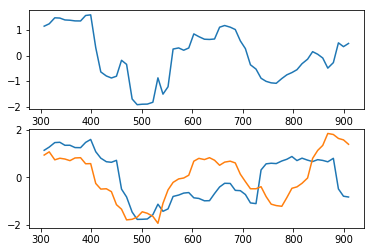

subject 24; gesture 1_1_2; avg 0.014102578257564315; sd 2.3430694418903987e-14
subject 24; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


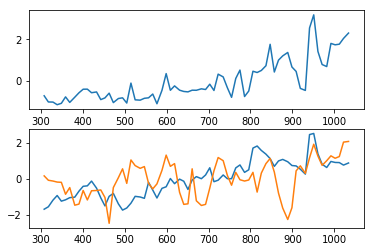

subject 24; gesture 1_1_1; avg 0.01589545238065539; sd 6.127578166461776e-07
subject 24; gesture 1_1_1; PoV: 0.999998945793558


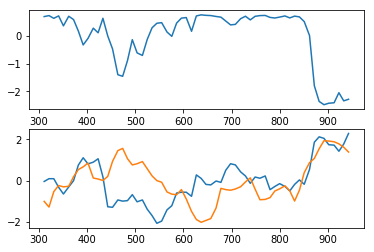

subject 24; gesture 1_0_1; avg 0.013168250797117793; sd 1.290855310589948e-11
subject 24; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


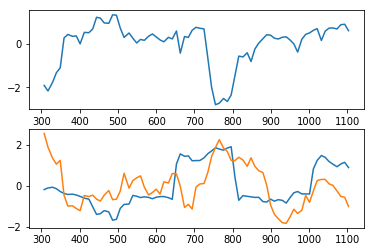

subject 24; gesture 1_0_2; avg 0.013714295628298382; sd 1.1550821411628002e-12
subject 24; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


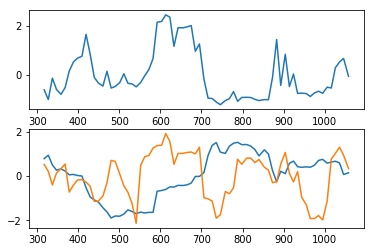

subject 33; gesture 1_1_2; avg 0.013530368531015328; sd 1.3908179330124051e-11
subject 33; gesture 1_1_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


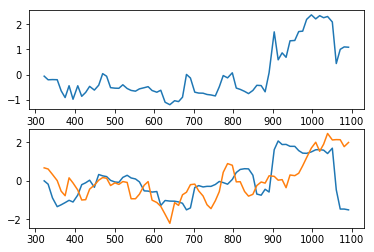

subject 33; gesture 1_1_1; avg 0.013181686333231015; sd 6.234719889539371e-15
subject 33; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


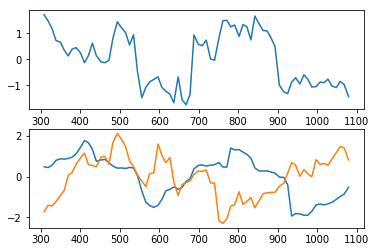

subject 33; gesture 1_0_1; avg 0.014432654015642336; sd 6.805768324423042e-10
subject 33; gesture 1_0_1; PoV: 0.9999999999996767


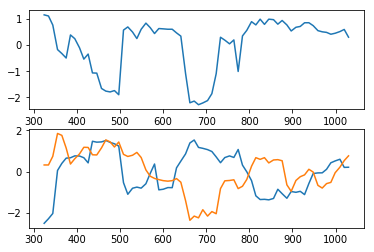

subject 33; gesture 1_0_2; avg 0.013217414802574445; sd 4.912734812074274e-10
subject 33; gesture 1_0_2; PoV: 0.9999999999991901


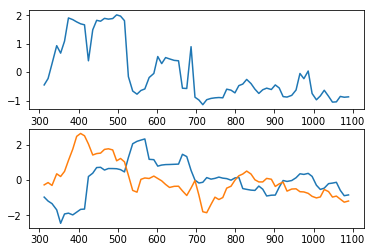

subject 11; gesture 1_1_2; avg 0.012686678305971344; sd 8.609871323026293e-15
subject 11; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


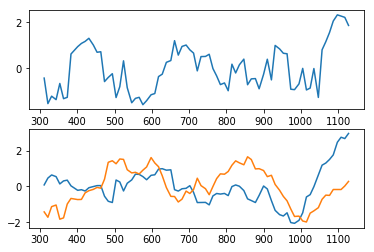

subject 11; gesture 1_1_1; avg 0.011419362295342197; sd 3.073549168713171e-13
subject 11; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


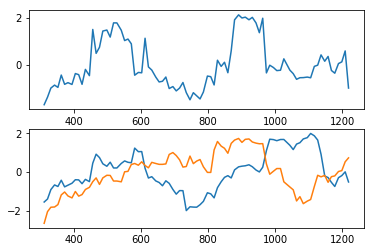

subject 11; gesture 1_0_1; avg 0.011935854547017491; sd 5.307486311209682e-12
subject 11; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


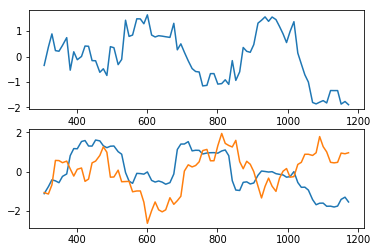

subject 11; gesture 1_0_2; avg 0.014138209452729443; sd 1.7486012992807059e-10
subject 11; gesture 1_0_2; PoV: 0.9999999999997963


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


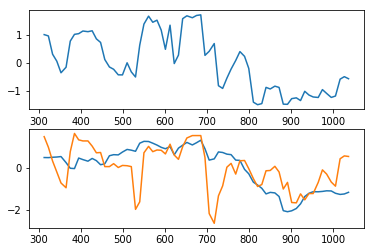

subject 35; gesture 1_1_2; avg 0.013573703545403114; sd 8.014069072153883e-09
subject 35; gesture 1_1_2; PoV: 0.9999999975183406


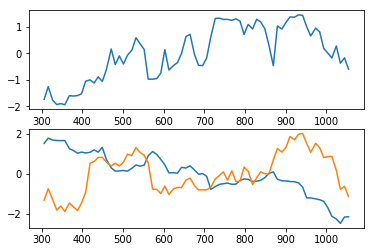

subject 35; gesture 1_1_1; avg 0.017859591947543788; sd 9.322364330389326e-09
subject 35; gesture 1_1_1; PoV: 0.9999999998394082


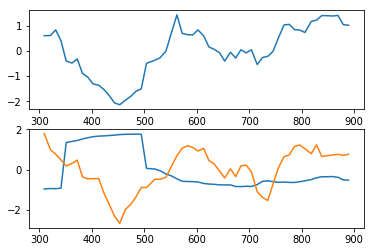

subject 35; gesture 1_0_1; avg 0.014754391049088574; sd 1.8559249258539328e-08
subject 35; gesture 1_0_1; PoV: 0.9999999950733751


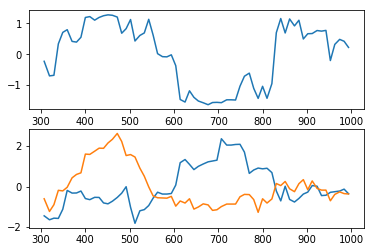

subject 35; gesture 1_0_2; avg 0.012793594487663288; sd 6.378512633504092e-10
subject 35; gesture 1_0_2; PoV: 0.9999999999997576


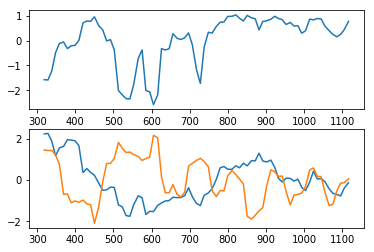

subject 22; gesture 1_1_2; avg 0.019125624142873235; sd 6.143109107526837e-08
subject 22; gesture 1_1_2; PoV: 0.9999999994948676


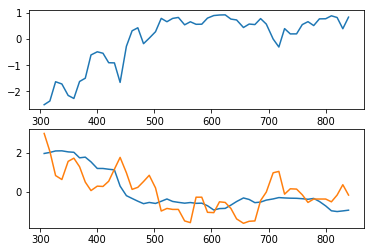

subject 22; gesture 1_1_1; avg 0.015272533297697432; sd 7.377943716275355e-12
subject 22; gesture 1_1_1; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


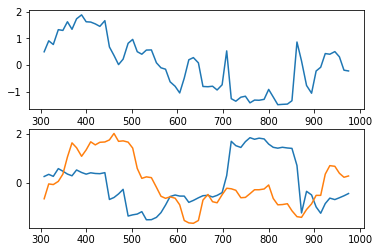

subject 22; gesture 1_0_1; avg 0.017030024243061107; sd 5.976140872543971e-09
subject 22; gesture 1_0_1; PoV: 0.9999999999587103


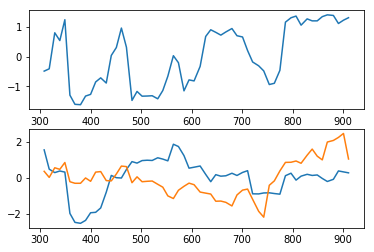

subject 22; gesture 1_0_2; avg 0.014211688776136589; sd 8.774872643858616e-11
subject 22; gesture 1_0_2; PoV: 0.9999999999999973


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


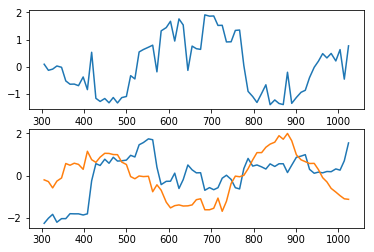

subject 34; gesture 1_1_2; avg 0.014996575408125939; sd 2.125618449310419e-14
subject 34; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


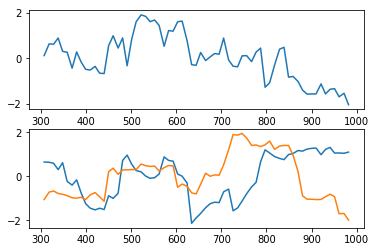

subject 34; gesture 1_1_1; avg 0.010644014157757668; sd 5.629890427379553e-10
subject 34; gesture 1_1_1; PoV: 0.9999999999997286


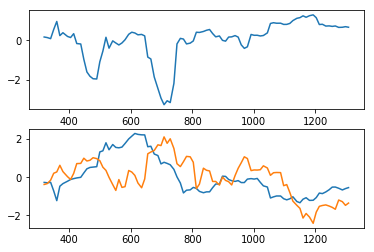

subject 34; gesture 1_0_1; avg 0.012618642622250556; sd 8.63747977691102e-08
subject 34; gesture 1_0_1; PoV: 0.9999999940688828


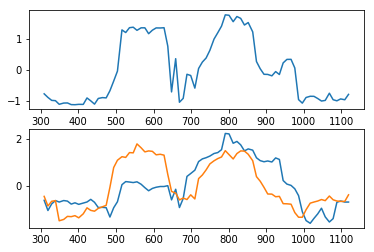

subject 34; gesture 1_0_2; avg 0.013028417756954763; sd 1.9576599557752352e-12
subject 34; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


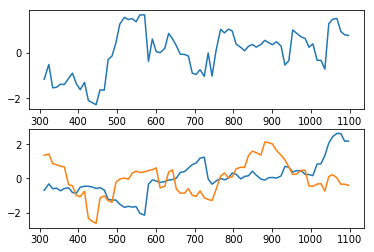

subject 10; gesture 1_1_2; avg 0.01573494785839644; sd 8.378022834659776e-08
subject 10; gesture 1_1_2; PoV: 0.9999999968606539


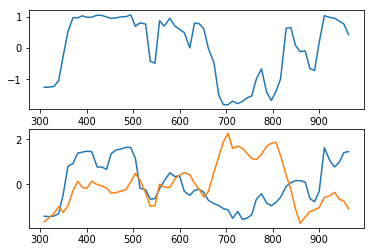

subject 10; gesture 1_1_1; avg 0.013555781102769454; sd 1.2462354829532039e-08
subject 10; gesture 1_1_1; PoV: 0.9999999999766035


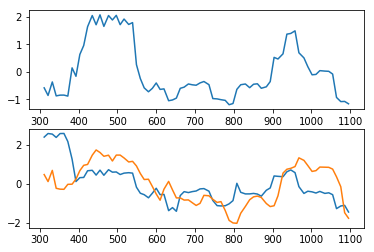

subject 10; gesture 1_0_1; avg 0.0085618772884514; sd 6.592406337361245e-15
subject 10; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


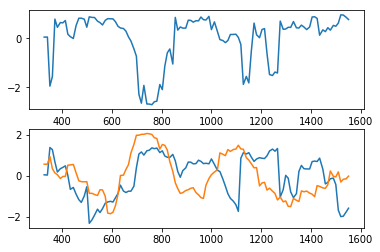

subject 10; gesture 1_0_2; avg 0.014446795323639773; sd 6.011349834676708e-12
subject 10; gesture 1_0_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


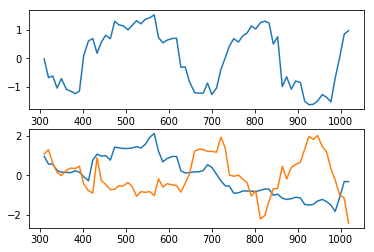

subject 02; gesture 1_1_2; avg 0.013937372149216304; sd 2.925711793604658e-09
subject 02; gesture 1_1_2; PoV: 0.9999999999934862


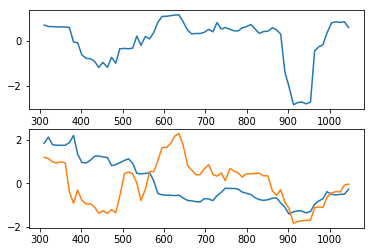

subject 02; gesture 1_1_1; avg 0.011846134367021012; sd 8.808128088433363e-15
subject 02; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


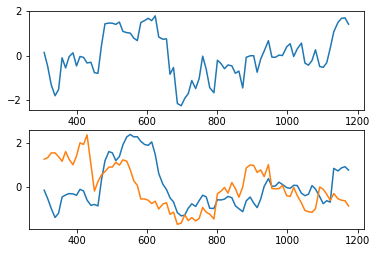

subject 02; gesture 1_0_1; avg 0.015531451648581584; sd 1.7589223343655456e-09
subject 02; gesture 1_0_1; PoV: 0.999999999987821


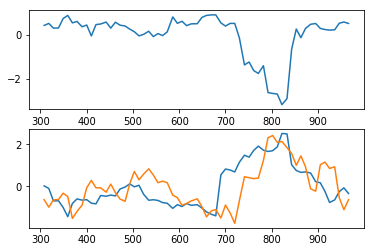

subject 02; gesture 1_0_2; avg 0.013220432803256611; sd 3.8774227596261843e-13
subject 02; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


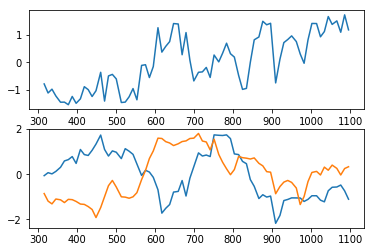

In [5]:
decomp_g1_ant = {}

for s, gdict in g1_dict_antag.items():
    decomp_g1_ant[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26

gesture 1_1_2

gesture 1_0_1

32

gesture 1_1_1

08

gesture 1_1_2

gesture 1_0_1

27

gesture 1_1_1

gesture 1_0_2

23

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25

gesture 1_0_1


18

gesture 1_1_2

gesture 1_1_1

29

gesture 1_1_1

gesture 1_0_1

15

gesture 1_1_1

12

gesture 1_1_2

gesture 1_0_1

19

gesture 1_1_1

07

gesture 1_1_2

gesture 1_0_1

gesture 1_0_2

20

gesture 1_0_1

31

gesture 1_1_2

gesture 1_0_1

13

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

36

gesture 1_1_2

24

gesture 1_1_1

gesture 1_0_1

33

gesture 1_0_1

11

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

gesture 1_0_2

35

gesture 1_0_2

22

gesture 1_0_1

gesture 1_0_2

34

gesture 1_0_1

gesture 1_0_2

10

gesture 1_1_2

gesture 1_0_1

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_ant.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_ant.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

6.416439799011215